## OSS tests - noises
With windowing before the first run (what we [did](https://nbviewer.jupyter.org/github/Mipanox/GPI_stuff/blob/master/othernotebooks/data_handling2.ipynb) to the data imgs)

In [153]:
%%capture
%load_ext autoreload
%autoreload 2+

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
exec(open('../codes/zernike.py'))
exec(open('../codes/pr.py'))
exec(open('../codes/util.py'))
%matplotlib inline

plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18

### <font color="red">Window size</font>
In diameter, unit in pixel

_**Note**: Previously tried 128, it worked quite well when noise is < 0.05% for even 1/10 aberration._

In [ ]:
size = 32

### 1. 0.5 % noise with 1/10 aberration

In [154]:
coeff2 = np.load('OSS_test_coeff2_2.npy')
coeff1 = [0]*35

Pn1,P_n1,Fn1,F_n1 = true_imgs(Npix=128,coeff1=coeff1,coeff2=coeff2,oversamp=2,
                              max_aberP=.05,noise_level=0.005)

##
Fn1_c = clipping(Fn1,512,size=size)
F_n1_c = clipping(F_n1,512,size=size,allpos=False)

testn1 = PR(pup=Pn1,foc=Fn1_c,oversamp=2)

Caution: Pupil image is not used for constraints.
         This is one-image process.


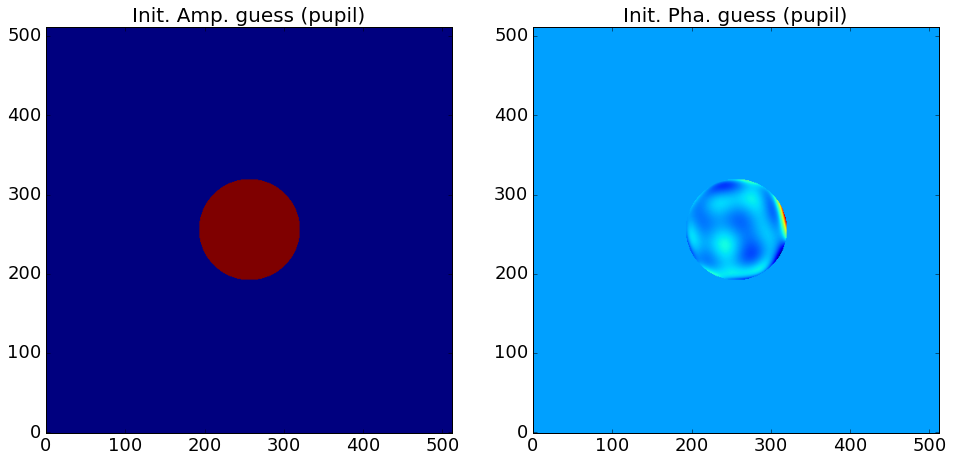

Current filter:


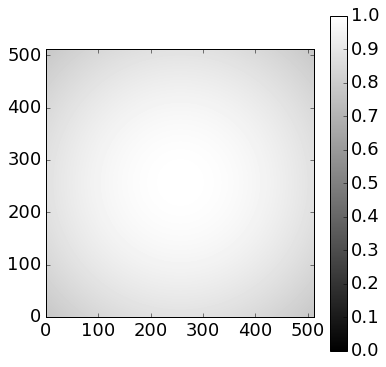

Current iter. : 100
        Error : 1.44e-02
Current iter. : 200
        Error : 1.44e-02
Current filter:


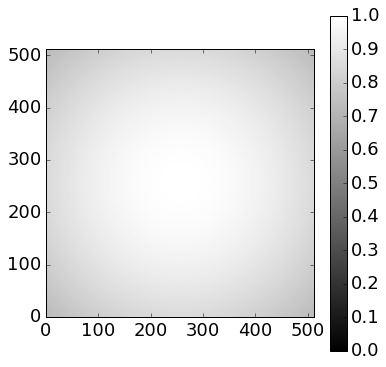

Current iter. : 300
        Error : 1.44e-02
Current iter. : 400
        Error : 1.44e-02
Current filter:


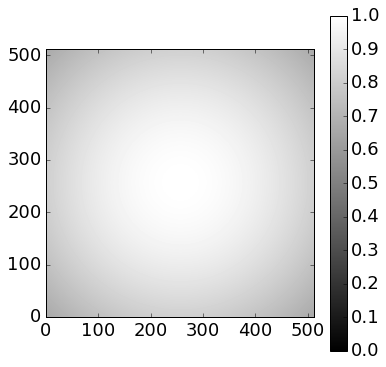

Current iter. : 500
        Error : 1.44e-02
Current iter. : 600
        Error : 1.44e-02
Current filter:


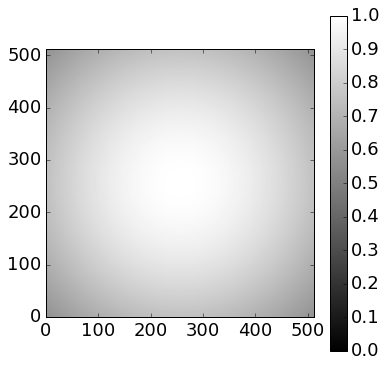

Current iter. : 700
        Error : 1.44e-02
Current iter. : 800
        Error : 1.44e-02
Current filter:


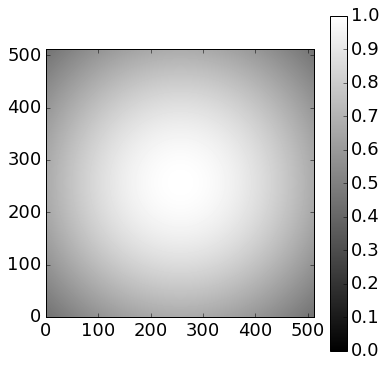

Current iter. : 900
        Error : 1.44e-02
Current iter. : 1000
        Error : 1.44e-02
Current filter:


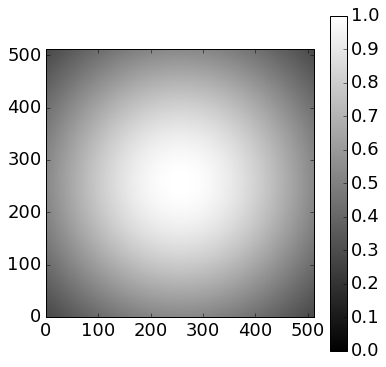

Current iter. : 1100
        Error : 1.44e-02
Current iter. : 1200
        Error : 1.44e-02
Current filter:


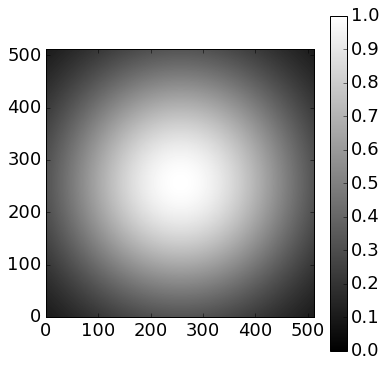

Current iter. : 1300
        Error : 1.44e-02
Current iter. : 1400
        Error : 1.44e-02
Current filter:


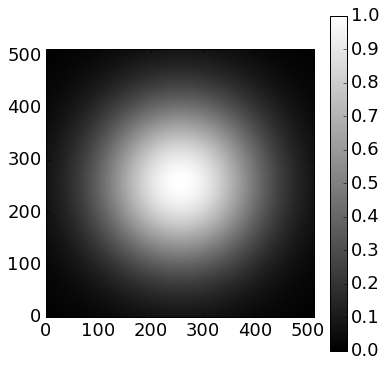

Current iter. : 1500
        Error : 1.44e-02
Current iter. : 1600
        Error : 1.44e-02
Current filter:


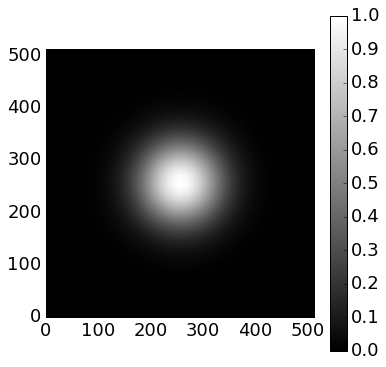

Current iter. : 1700
        Error : 1.44e-02
Current iter. : 1800
        Error : 1.44e-02
Current filter:


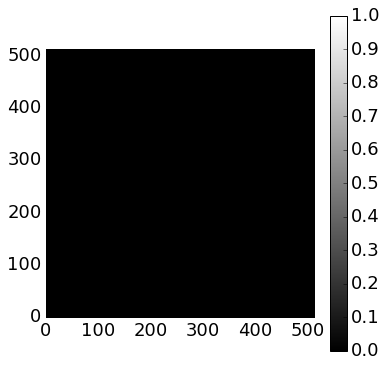

Current iter. : 1900
        Error : 1.44e-02
Current iter. : 2000
        Error : 1.44e-02
-----------------------
First iteration error: 6.12e-02
Final iteration : 2000
Final Error: 1.44e-02


In [156]:
OSS_pup_n1,OSS_foc_n1, \
OSS_errlist_n1, \
OSS_pup_proj_n1, \
OSS_errpuplist_n1 = testn1.OSS(beta=0.5,force_only_phase=True,init='random')

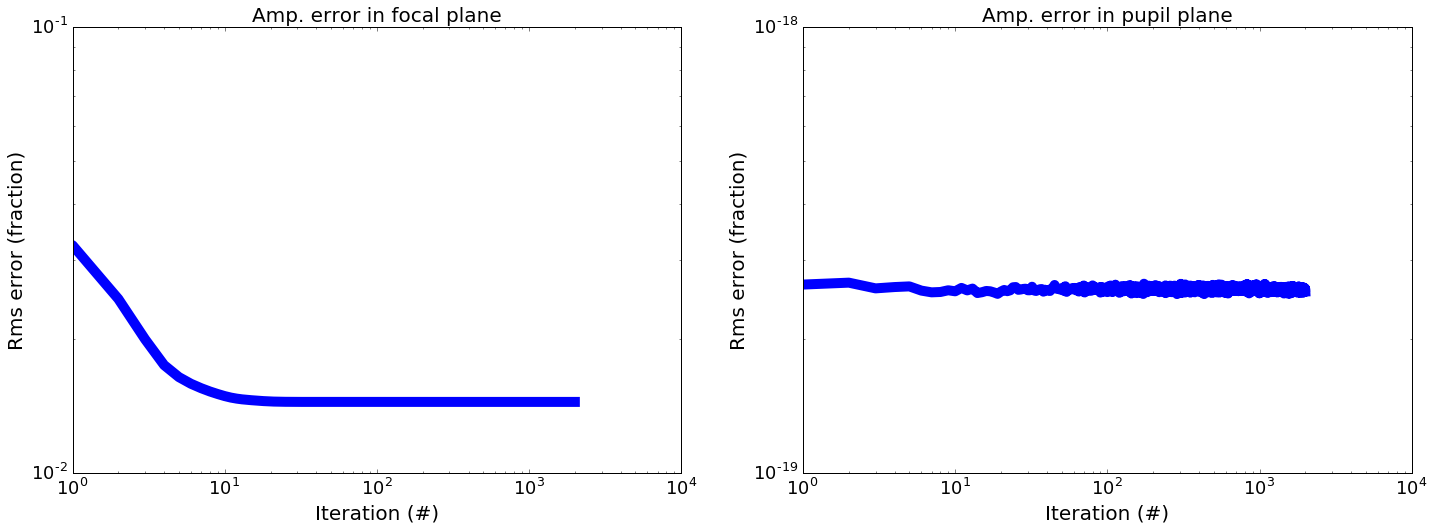

In [157]:
plot_errlist(OSS_errlist_n1,OSS_errpuplist_n1)

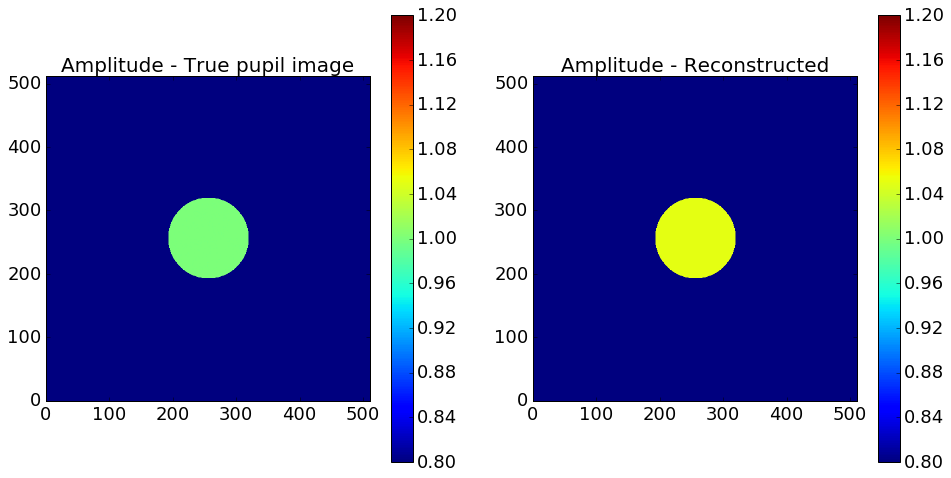

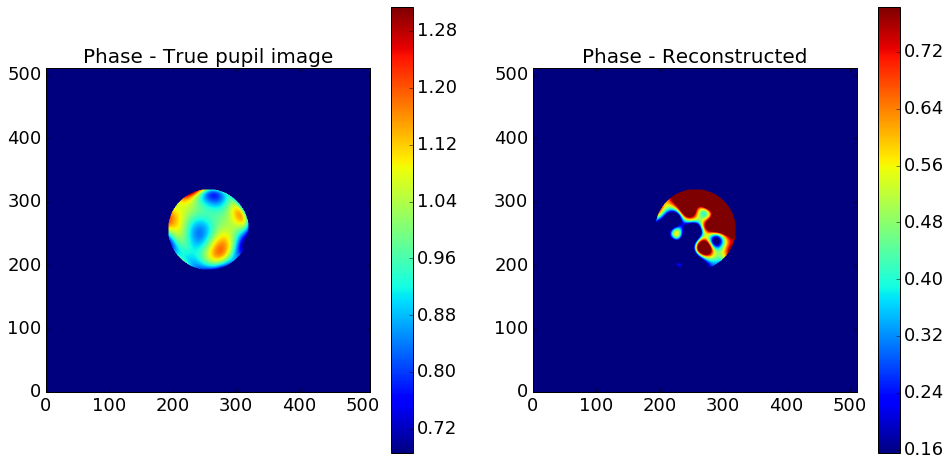

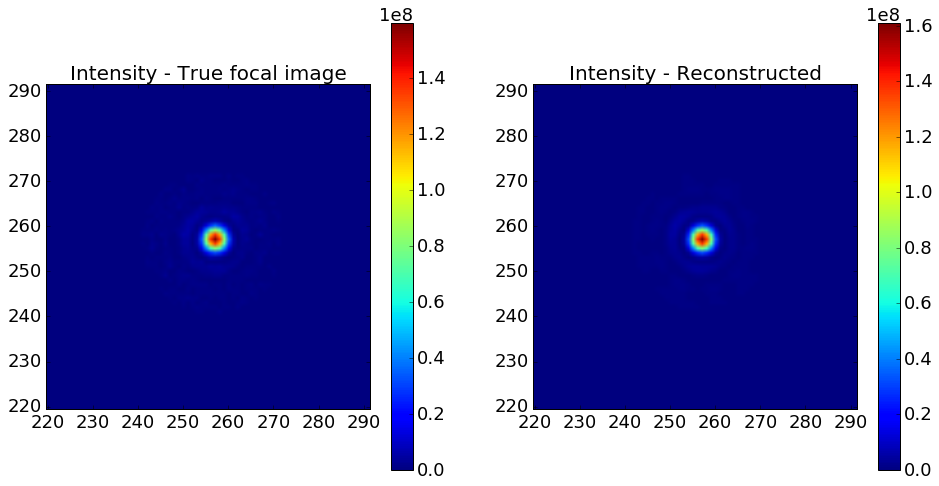

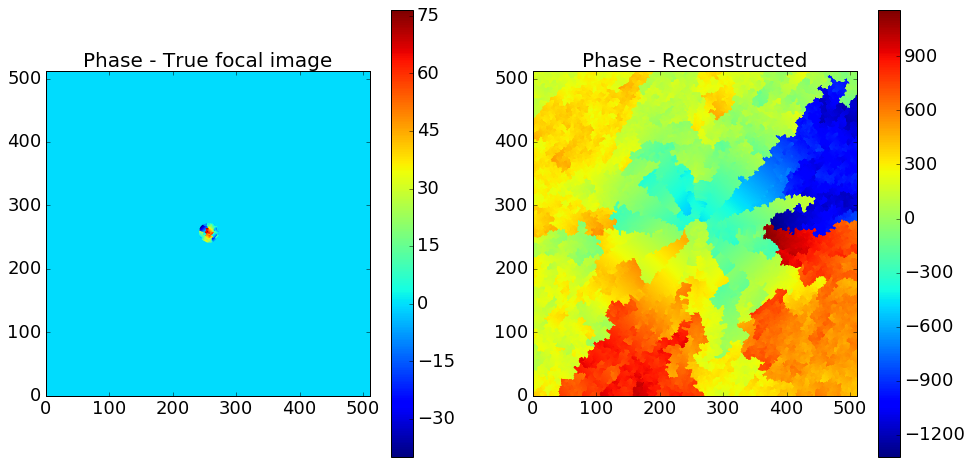

In [158]:
plot_recon(P_n1,F_n1_c,OSS_pup_proj_n1,OSS_foc_n1,recons_clim=True,max_abrPha=.05)

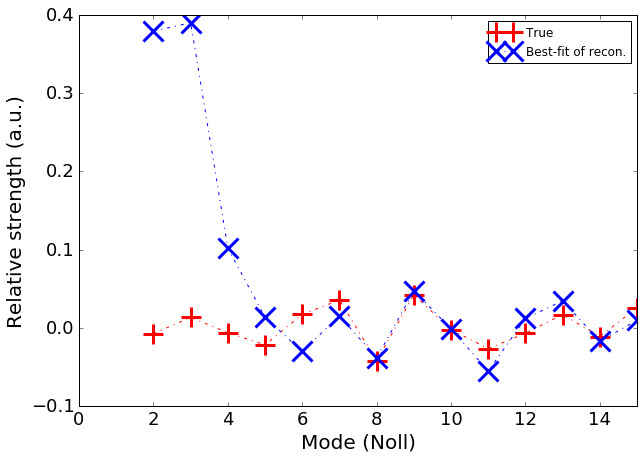

In [159]:
coef_n1_true2, \
coef_n1_reco2 = wrap_up_zern_fit(testn1,
                                 Recon_phasor=OSS_pup_proj_n1,
                                 P_phasor=P_n1,
                                 oversamp=2)

### 2. 0.5 % noise with 1/5 aberration

In [160]:
Pn2,P_n2,Fn2,F_n2 = true_imgs(Npix=128,coeff1=coeff1,coeff2=coeff2,oversamp=2,
                              max_aberP=.2,noise_level=0.005)

##
Fn2_c = clipping(Fn2,512,size=size)
F_n2_c = clipping(F_n2,512,size=size,allpos=False)

testn2 = PR(pup=Pn2,foc=Fn2_c,oversamp=2)

Caution: Pupil image is not used for constraints.
         This is one-image process.


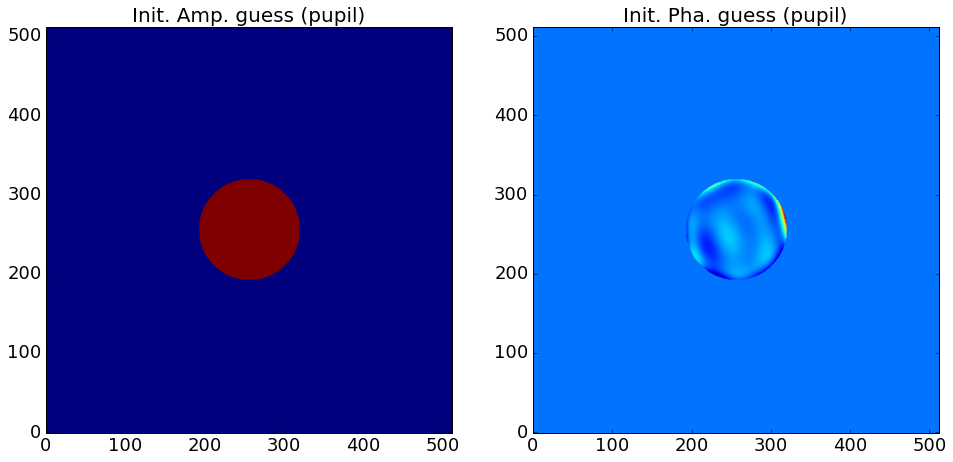

Current filter:


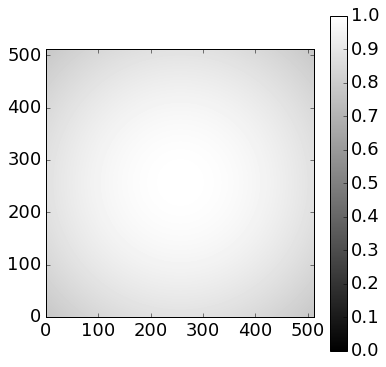

Current iter. : 100
        Error : 1.39e-02
Current iter. : 200
        Error : 1.39e-02
Current filter:


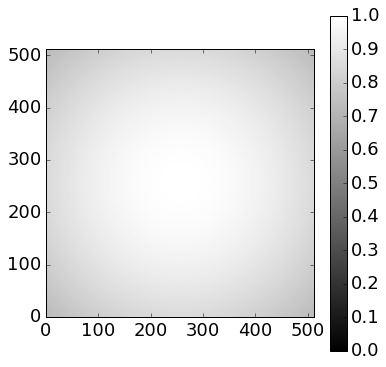

Current iter. : 300
        Error : 1.39e-02
Current iter. : 400
        Error : 1.39e-02
Current filter:


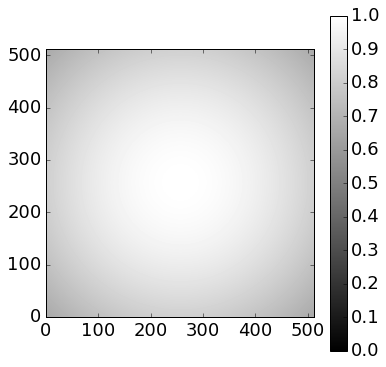

Current iter. : 500
        Error : 1.39e-02
Current iter. : 600
        Error : 1.39e-02
Current filter:


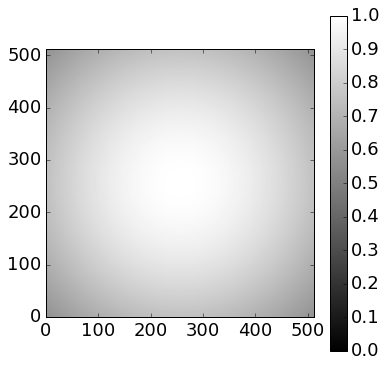

Current iter. : 700
        Error : 1.39e-02
Current iter. : 800
        Error : 1.39e-02
Current filter:


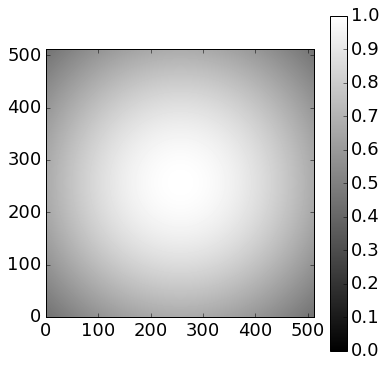

Current iter. : 900
        Error : 1.39e-02
Current iter. : 1000
        Error : 1.39e-02
Current filter:


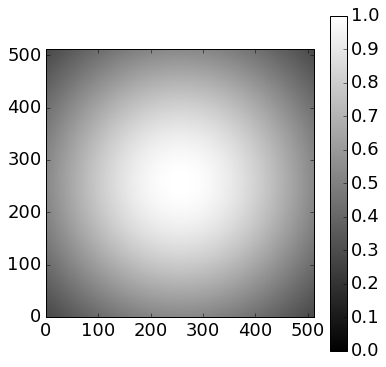

Current iter. : 1100
        Error : 1.39e-02
Current iter. : 1200
        Error : 1.39e-02
Current filter:


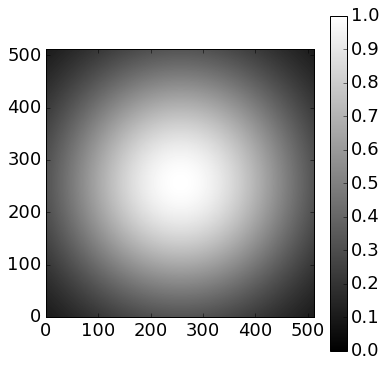

Current iter. : 1300
        Error : 1.39e-02
Current iter. : 1400
        Error : 1.39e-02
Current filter:


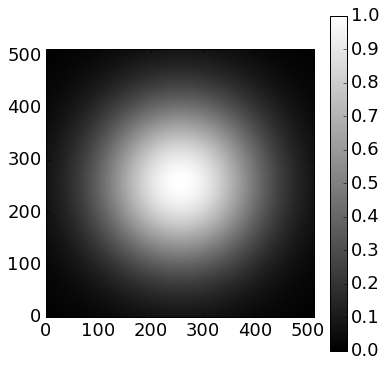

Current iter. : 1500
        Error : 1.39e-02
Current iter. : 1600
        Error : 1.39e-02
Current filter:


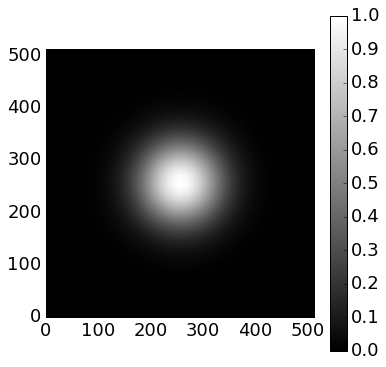

Current iter. : 1700
        Error : 1.39e-02
Current iter. : 1800
        Error : 1.39e-02
Current filter:


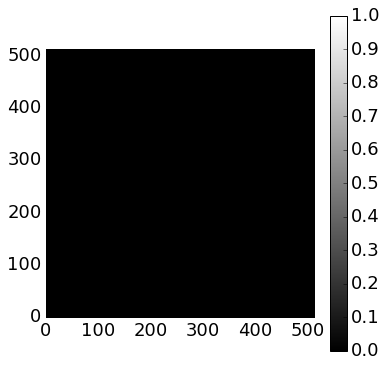

Current iter. : 1900
        Error : 1.39e-02
Current iter. : 2000
        Error : 1.39e-02
-----------------------
First iteration error: 5.38e-02
Final iteration : 2000
Final Error: 1.39e-02


In [161]:
OSS_pup_n2,OSS_foc_n2, \
OSS_errlist_n2, \
OSS_pup_proj_n2, \
OSS_errpuplist_n2 = testn2.OSS(beta=0.5,force_only_phase=True,init='random')

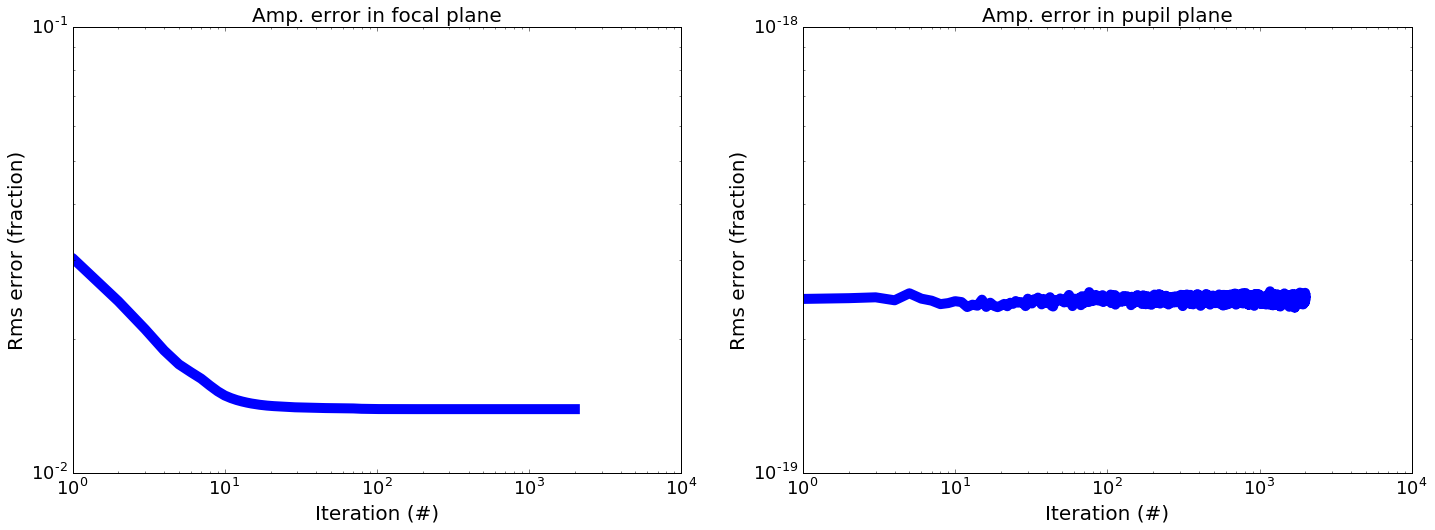

In [162]:
plot_errlist(OSS_errlist_n2,OSS_errpuplist_n2)

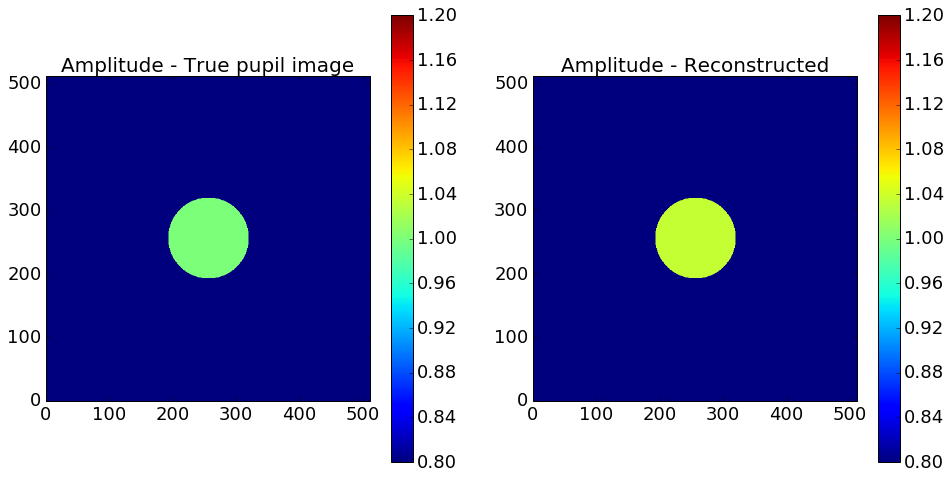

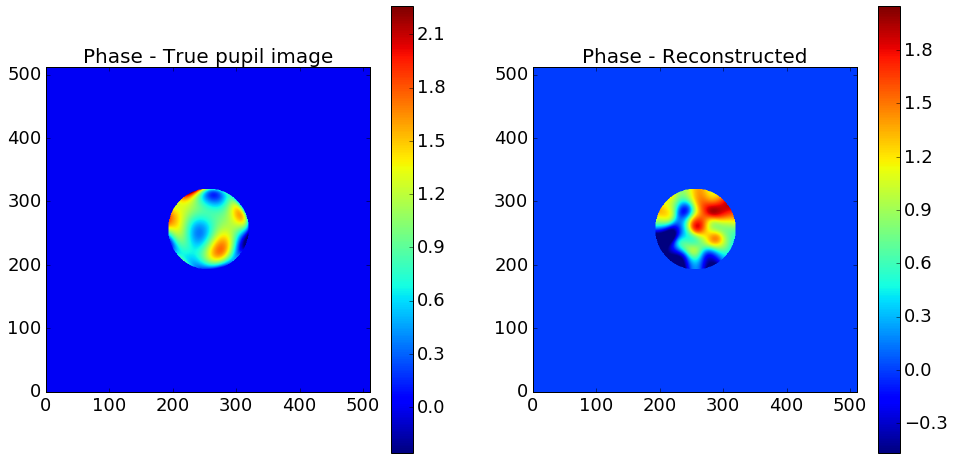

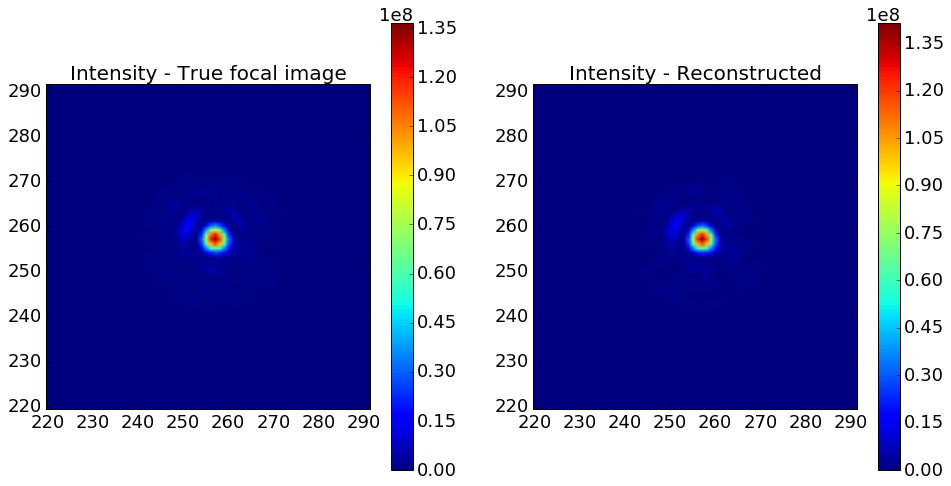

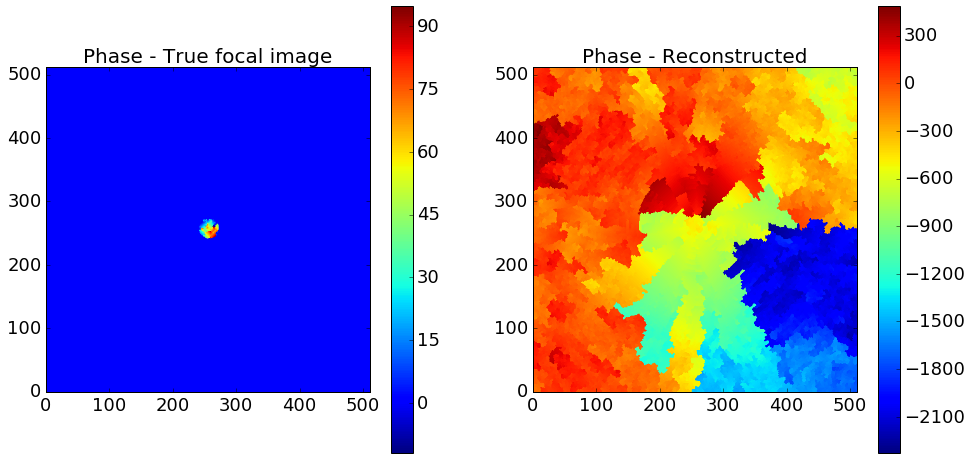

In [163]:
plot_recon(P_n2,F_n2_c,OSS_pup_proj_n2,OSS_foc_n2,recons_clim=True,max_abrPha=.2)

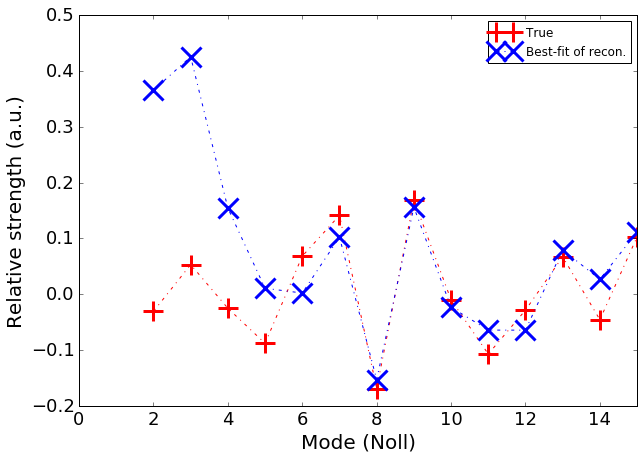

In [200]:
coef_n2_true2, \
coef_n2_reco2 = wrap_up_zern_fit(testn2,
                                 Recon_phasor=OSS_pup_proj_n2,
                                 P_phasor=P_n2,
                                 oversamp=2,flip=True)

### 3. 0.1 % noise with 1/5 aberration

In [165]:
Pn3,P_n3,Fn3,F_n3 = true_imgs(Npix=128,coeff1=coeff1,coeff2=coeff2,oversamp=2,
                              max_aberP=.2,noise_level=0.001)
##
Fn3_c = clipping(Fn3,512,size=size)
F_n3_c = clipping(F_n3,512,size=size,allpos=False)

testn3 = PR(pup=Pn3,foc=Fn3_c,oversamp=2)

Caution: Pupil image is not used for constraints.
         This is one-image process.


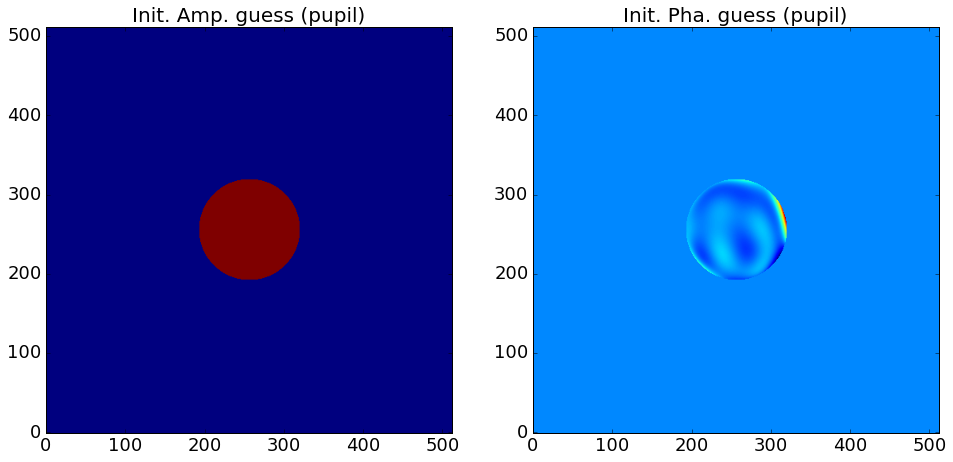

Current filter:


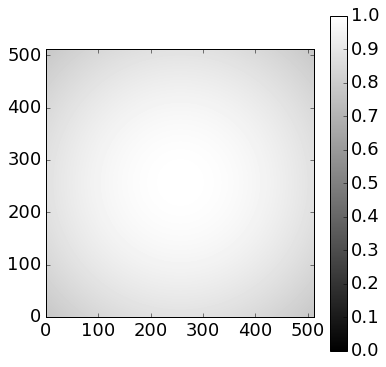

Current iter. : 100
        Error : 1.38e-02
Current iter. : 200
        Error : 1.38e-02
Current filter:


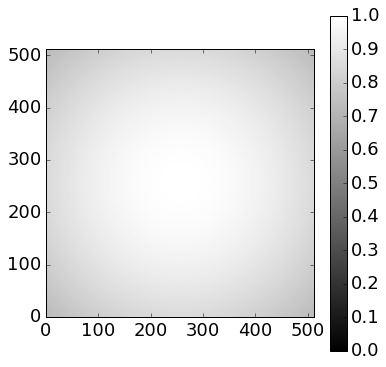

Current iter. : 300
        Error : 1.38e-02
Current iter. : 400
        Error : 1.38e-02
Current filter:


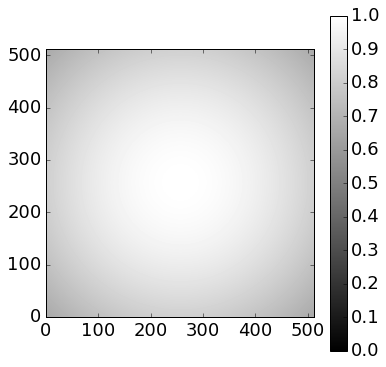

Current iter. : 500
        Error : 1.38e-02
Current iter. : 600
        Error : 1.38e-02
Current filter:


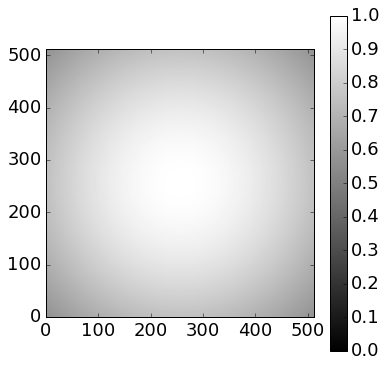

Current iter. : 700
        Error : 1.38e-02
Current iter. : 800
        Error : 1.38e-02
Current filter:


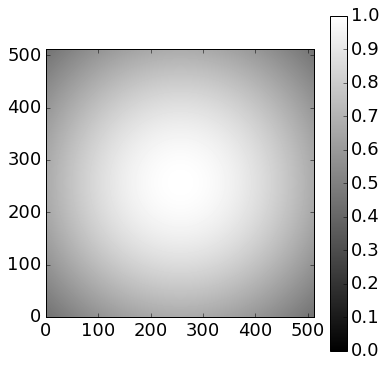

Current iter. : 900
        Error : 1.38e-02
Current iter. : 1000
        Error : 1.38e-02
Current filter:


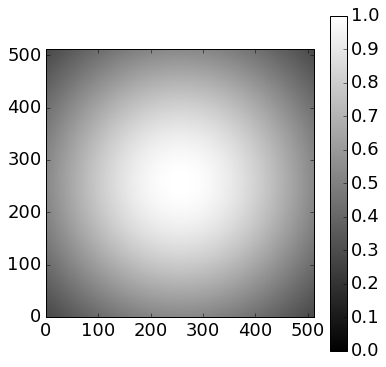

Current iter. : 1100
        Error : 1.38e-02
Current iter. : 1200
        Error : 1.38e-02
Current filter:


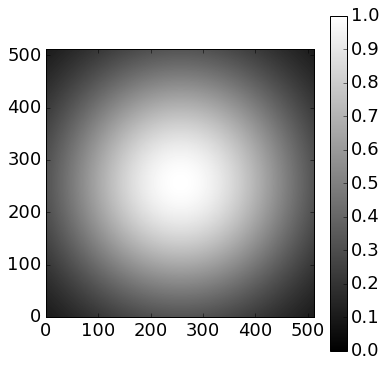

Current iter. : 1300
        Error : 1.38e-02
Current iter. : 1400
        Error : 1.38e-02
Current filter:


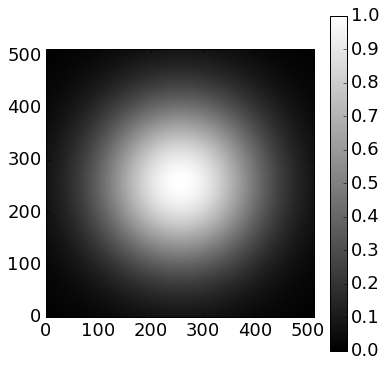

Current iter. : 1500
        Error : 1.38e-02
Current iter. : 1600
        Error : 1.38e-02
Current filter:


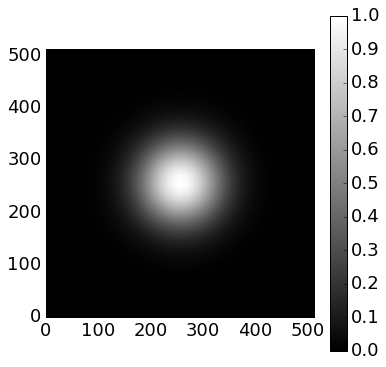

Current iter. : 1700
        Error : 1.38e-02
Current iter. : 1800
        Error : 1.38e-02
Current filter:


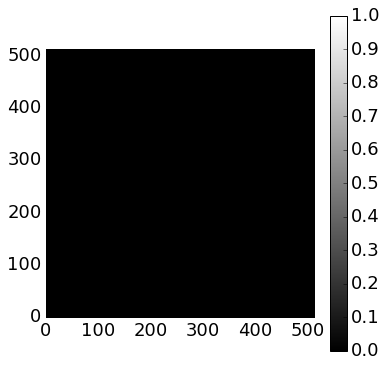

Current iter. : 1900
        Error : 1.38e-02
Current iter. : 2000
        Error : 1.38e-02
-----------------------
First iteration error: 6.84e-02
Final iteration : 2000
Final Error: 1.38e-02


In [166]:
OSS_pup_n3,OSS_foc_n3, \
OSS_errlist_n3, \
OSS_pup_proj_n3, \
OSS_errpuplist_n3 = testn3.OSS(beta=0.5,force_only_phase=True,init='random')

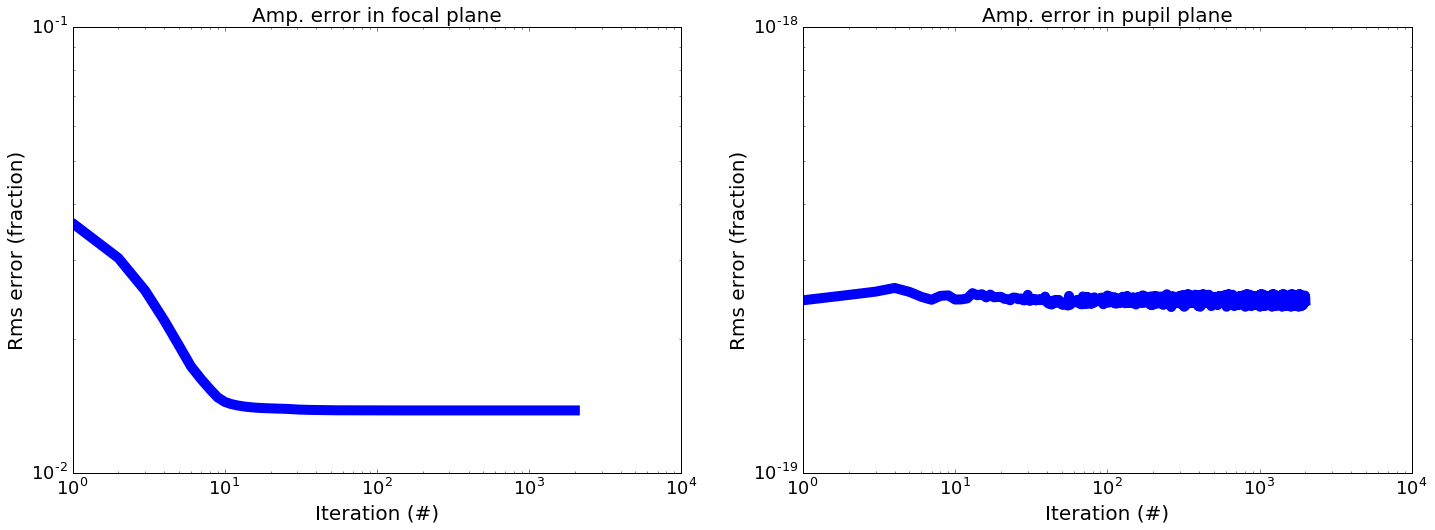

In [167]:
plot_errlist(OSS_errlist_n3,OSS_errpuplist_n3)

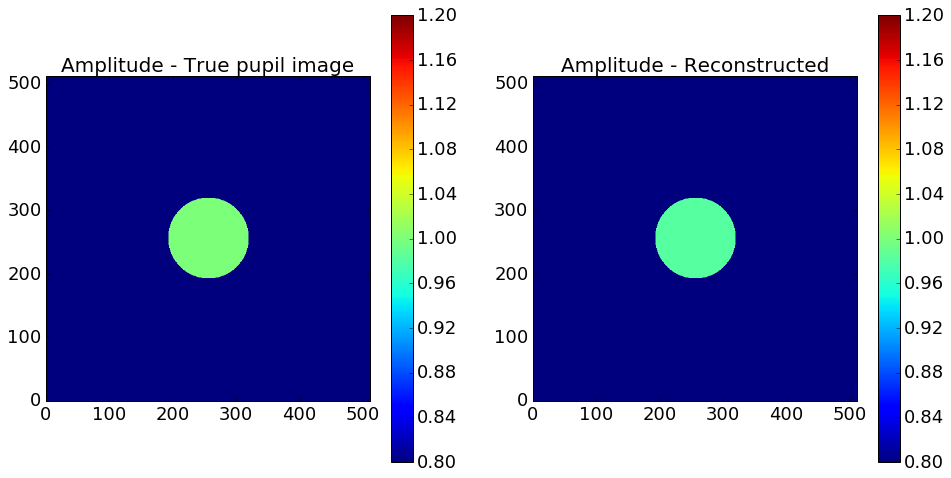

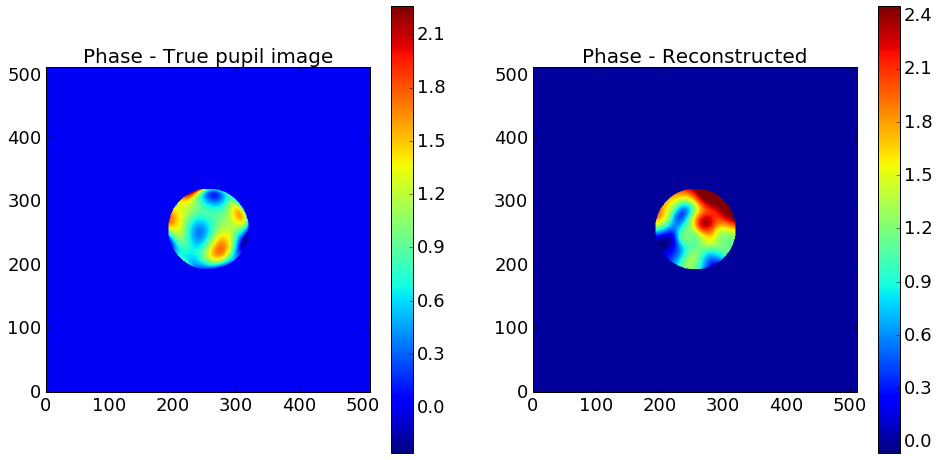

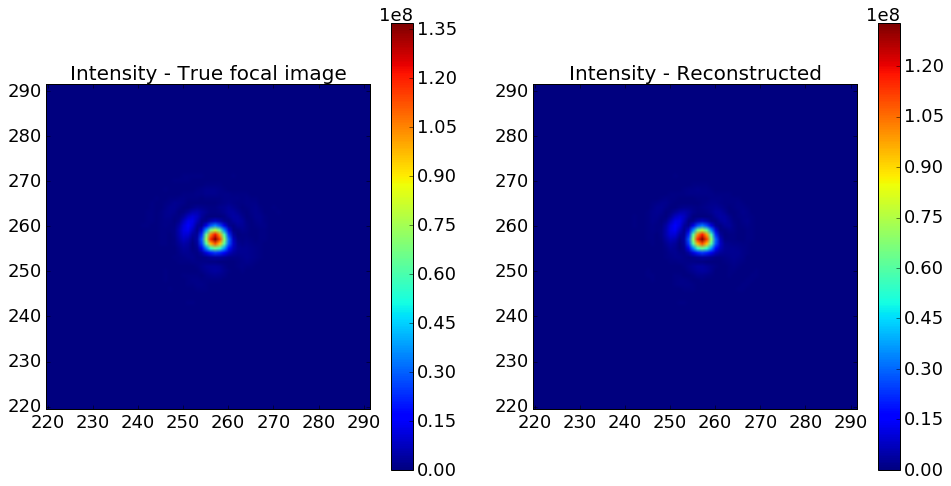

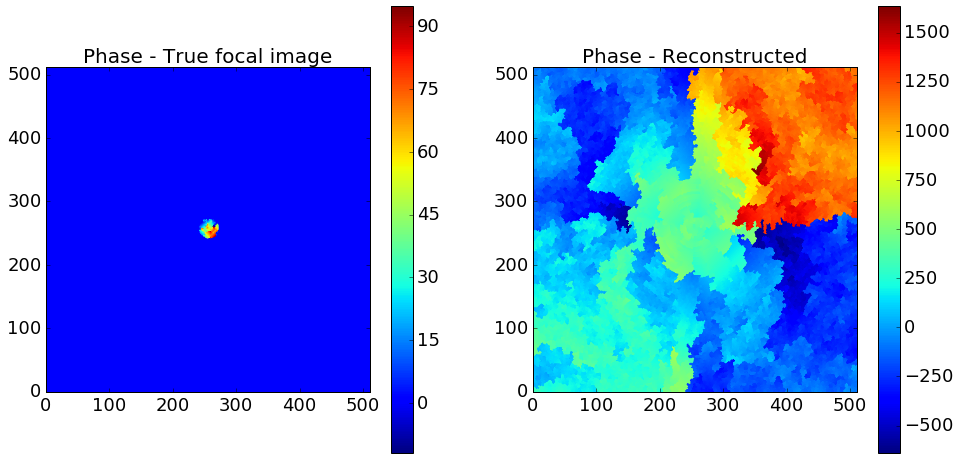

In [168]:
plot_recon(P_n3,F_n3_c,OSS_pup_proj_n3,OSS_foc_n3,recons_clim=True,max_abrPha=.2)

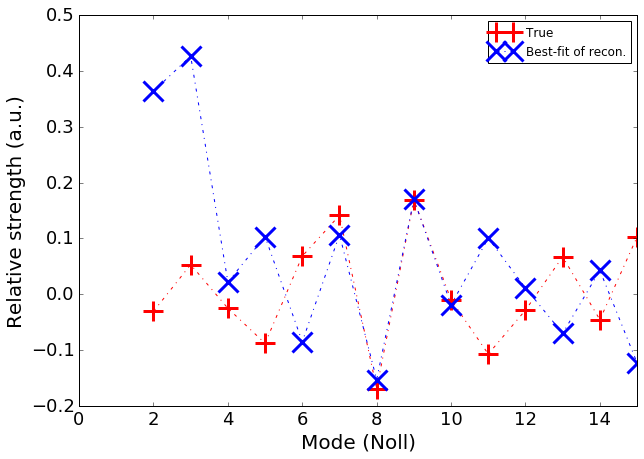

In [169]:
coef_n3_true2, \
coef_n3_reco2 = wrap_up_zern_fit(testn3,
                                 Recon_phasor=OSS_pup_proj_n3,
                                 P_phasor=P_n3,
                                 oversamp=2)

### 4. 0.05 % noise with 1/5 aberration

In [170]:
Pn4,P_n4,Fn4,F_n4 = true_imgs(Npix=128,coeff1=coeff1,coeff2=coeff2,oversamp=2,
                              max_aberP=.2,noise_level=0.0005)
##
Fn4_c = clipping(Fn4,512,size=size)
F_n4_c = clipping(F_n4,512,size=size,allpos=False)

testn4 = PR(pup=Pn4,foc=Fn4_c,oversamp=2)

Caution: Pupil image is not used for constraints.
         This is one-image process.


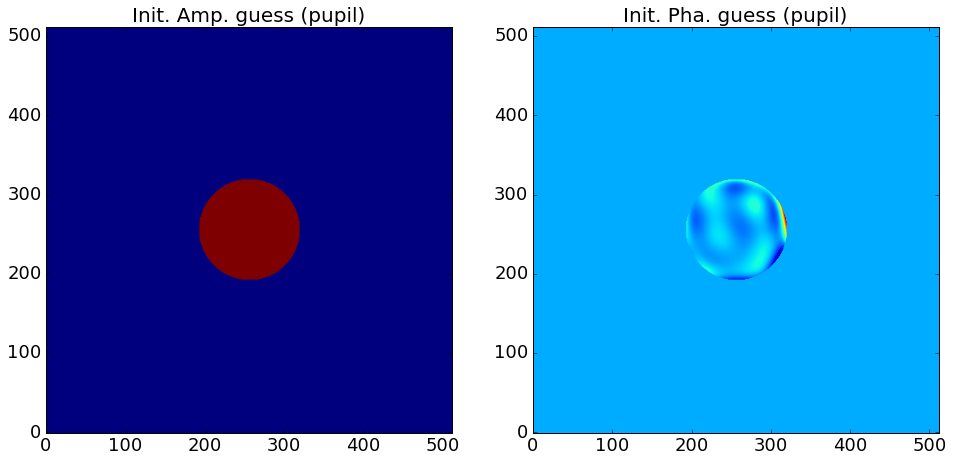

Current filter:


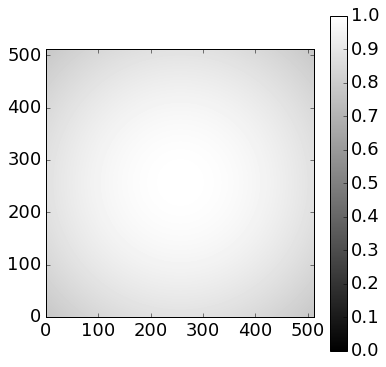

Current iter. : 100
        Error : 1.40e-02
Current iter. : 200
        Error : 1.40e-02
Current filter:


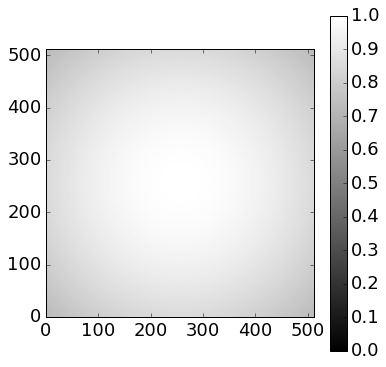

Current iter. : 300
        Error : 1.40e-02
Current iter. : 400
        Error : 1.40e-02
Current filter:


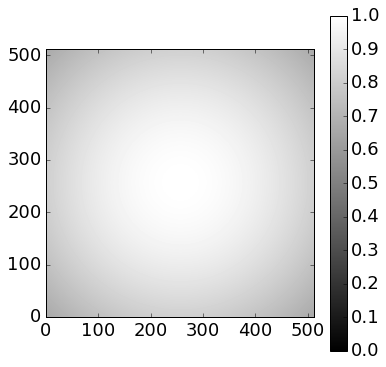

Current iter. : 500
        Error : 1.40e-02
Current iter. : 600
        Error : 1.40e-02
Current filter:


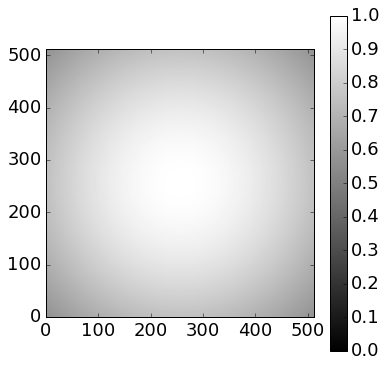

Current iter. : 700
        Error : 1.40e-02
Current iter. : 800
        Error : 1.40e-02
Current filter:


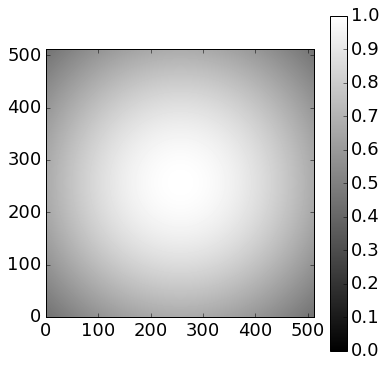

Current iter. : 900
        Error : 1.40e-02
Current iter. : 1000
        Error : 1.40e-02
Current filter:


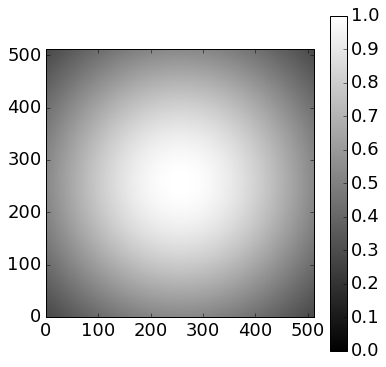

Current iter. : 1100
        Error : 1.40e-02
Current iter. : 1200
        Error : 1.40e-02
Current filter:


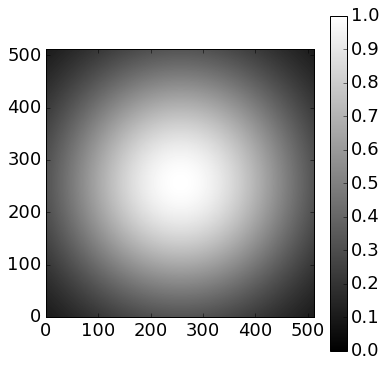

Current iter. : 1300
        Error : 1.40e-02
Current iter. : 1400
        Error : 1.40e-02
Current filter:


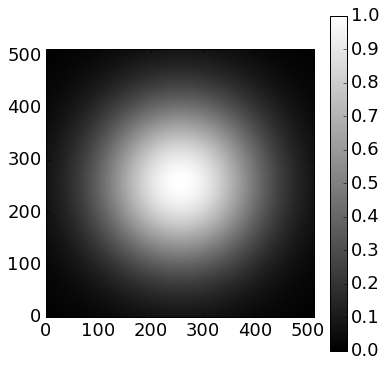

Current iter. : 1500
        Error : 1.40e-02
Current iter. : 1600
        Error : 1.40e-02
Current filter:


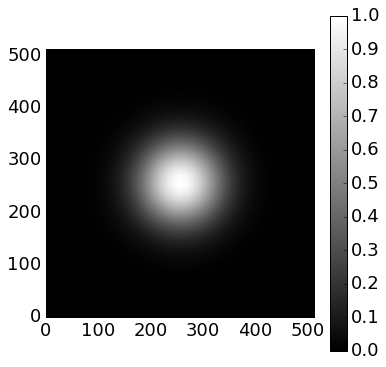

Current iter. : 1700
        Error : 1.40e-02
Current iter. : 1800
        Error : 1.40e-02
Current filter:


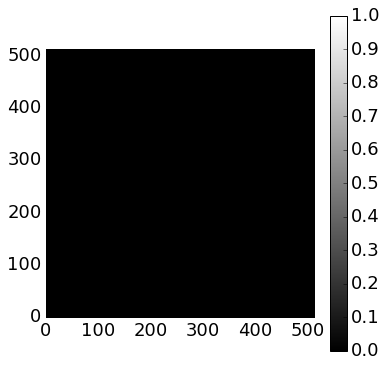

Current iter. : 1900
        Error : 1.40e-02
Current iter. : 2000
        Error : 1.40e-02
-----------------------
First iteration error: 6.59e-02
Final iteration : 2000
Final Error: 1.40e-02


In [171]:
OSS_pup_n4,OSS_foc_n4, \
OSS_errlist_n4, \
OSS_pup_proj_n4, \
OSS_errpuplist_n4 = testn4.OSS(beta=0.5,force_only_phase=True,init='random')

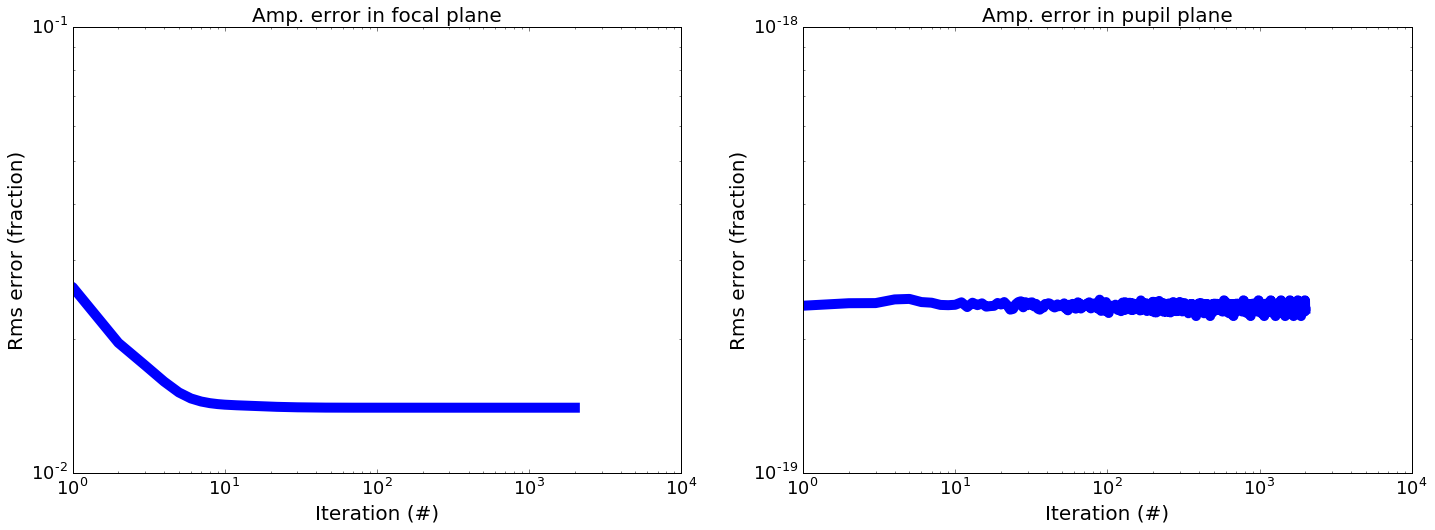

In [172]:
plot_errlist(OSS_errlist_n4,OSS_errpuplist_n4)

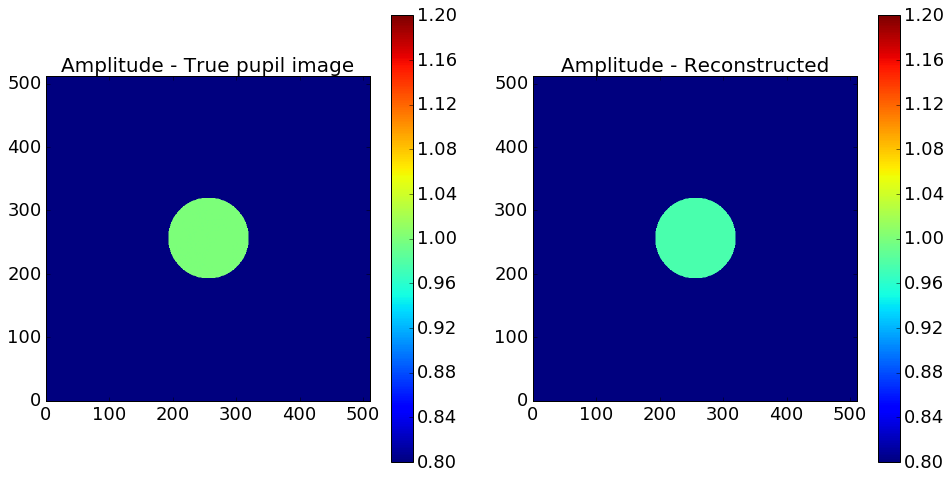

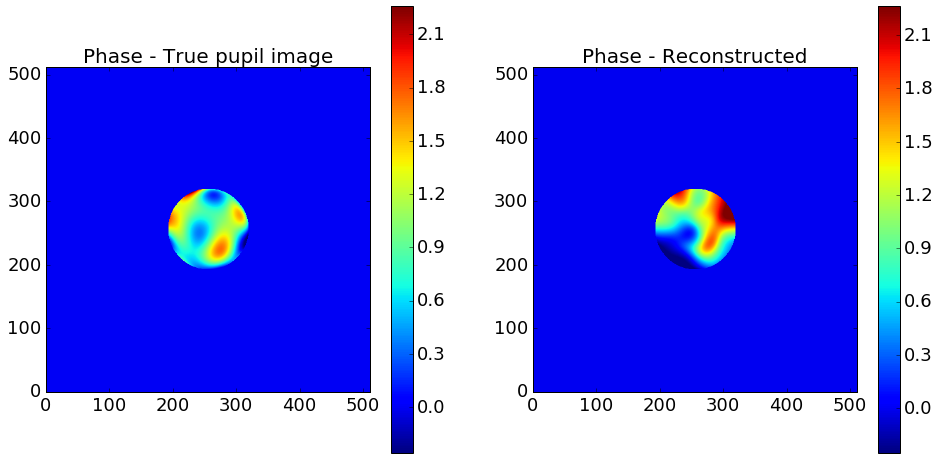

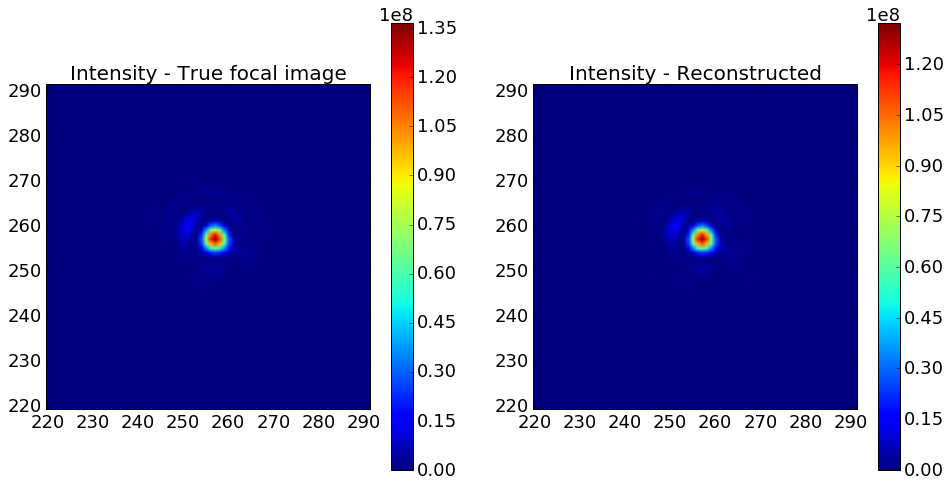

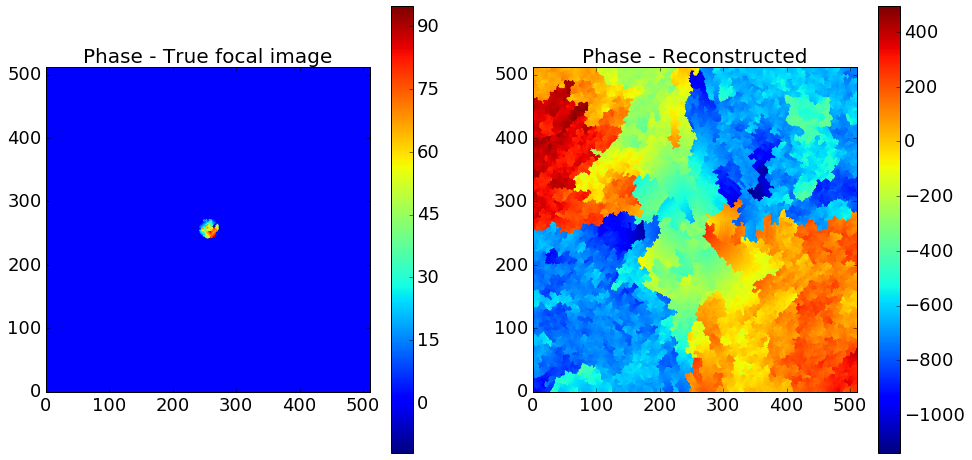

In [173]:
plot_recon(P_n4,F_n4_c,OSS_pup_proj_n4,OSS_foc_n4,recons_clim=True,max_abrPha=.2)

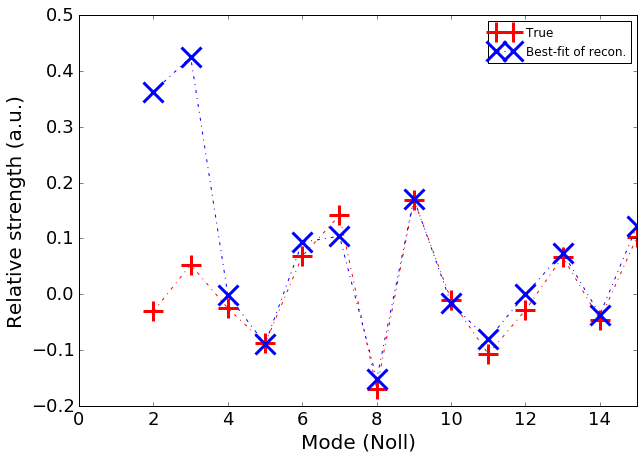

In [174]:
coef_n4_true2, \
coef_n4_reco2 = wrap_up_zern_fit(testn4,
                                 Recon_phasor=OSS_pup_proj_n4,
                                 P_phasor=P_n4,
                                 oversamp=2)

### 5. 0.05 % noise with 1/10 aberration

In [175]:
Pn5,P_n5,Fn5,F_n5 = true_imgs(Npix=128,coeff1=coeff1,coeff2=coeff2,oversamp=2,
                              max_aberP=.05,noise_level=0.0005)
##
Fn5_c = clipping(Fn5,512,size=size)
F_n5_c = clipping(F_n5,512,size=size,allpos=False)

testn5 = PR(pup=Pn5,foc=Fn5_c,oversamp=2)

Caution: Pupil image is not used for constraints.
         This is one-image process.


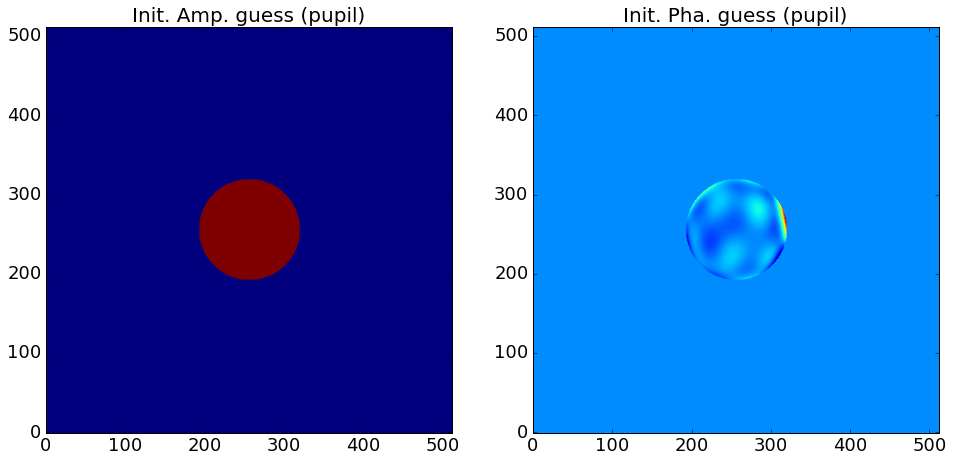

Current filter:


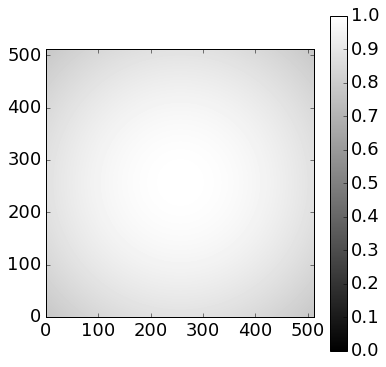

Current iter. : 100
        Error : 1.52e-02
Current iter. : 200
        Error : 1.52e-02
Current filter:


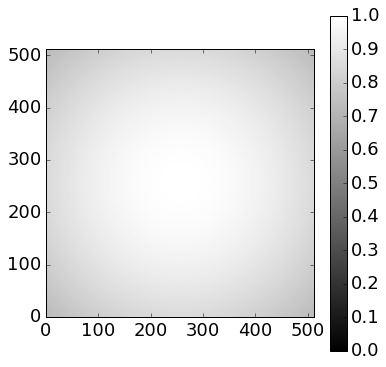

Current iter. : 300
        Error : 1.52e-02
Current iter. : 400
        Error : 1.52e-02
Current filter:


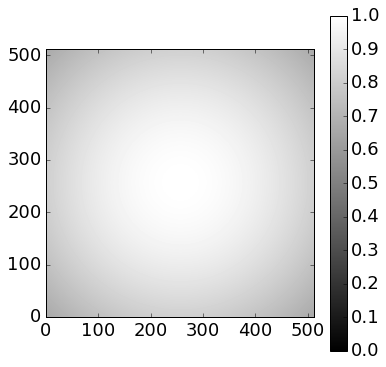

Current iter. : 500
        Error : 1.52e-02
Current iter. : 600
        Error : 1.52e-02
Current filter:


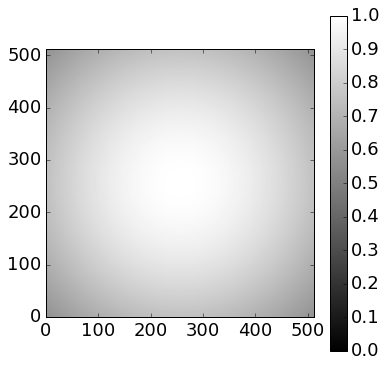

Current iter. : 700
        Error : 1.52e-02
Current iter. : 800
        Error : 1.52e-02
Current filter:


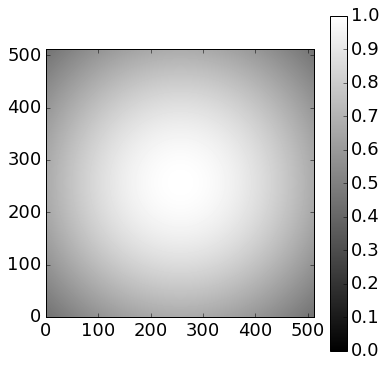

Current iter. : 900
        Error : 1.52e-02
Current iter. : 1000
        Error : 1.52e-02
Current filter:


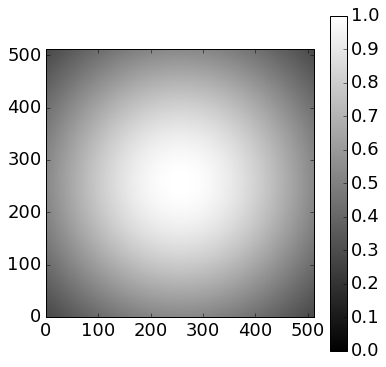

Current iter. : 1100
        Error : 1.52e-02
Current iter. : 1200
        Error : 1.52e-02
Current filter:


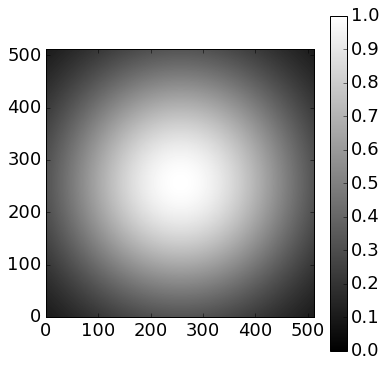

Current iter. : 1300
        Error : 1.52e-02
Current iter. : 1400
        Error : 1.52e-02
Current filter:


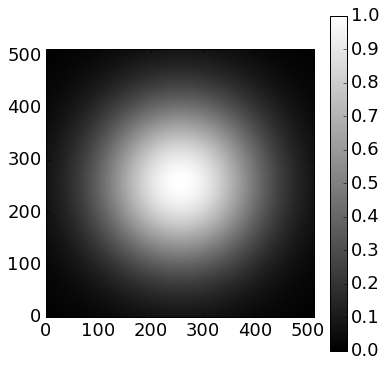

Current iter. : 1500
        Error : 1.52e-02
Current iter. : 1600
        Error : 1.52e-02
Current filter:


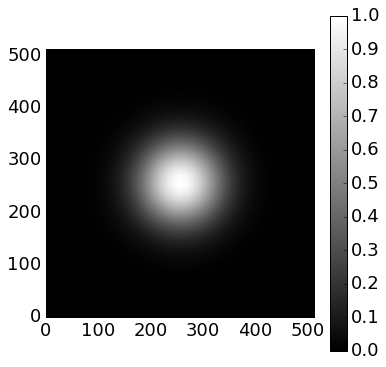

Current iter. : 1700
        Error : 1.52e-02
Current iter. : 1800
        Error : 1.52e-02
Current filter:


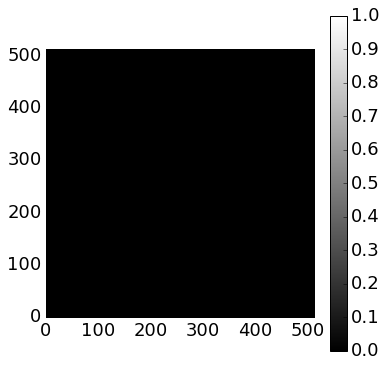

Current iter. : 1900
        Error : 1.52e-02
Current iter. : 2000
        Error : 1.52e-02
-----------------------
First iteration error: 7.28e-02
Final iteration : 2000
Final Error: 1.52e-02


In [176]:
OSS_pup_n5,OSS_foc_n5, \
OSS_errlist_n5, \
OSS_pup_proj_n5, \
OSS_errpuplist_n5 = testn5.OSS(beta=0.5,force_only_phase=True,init='random')

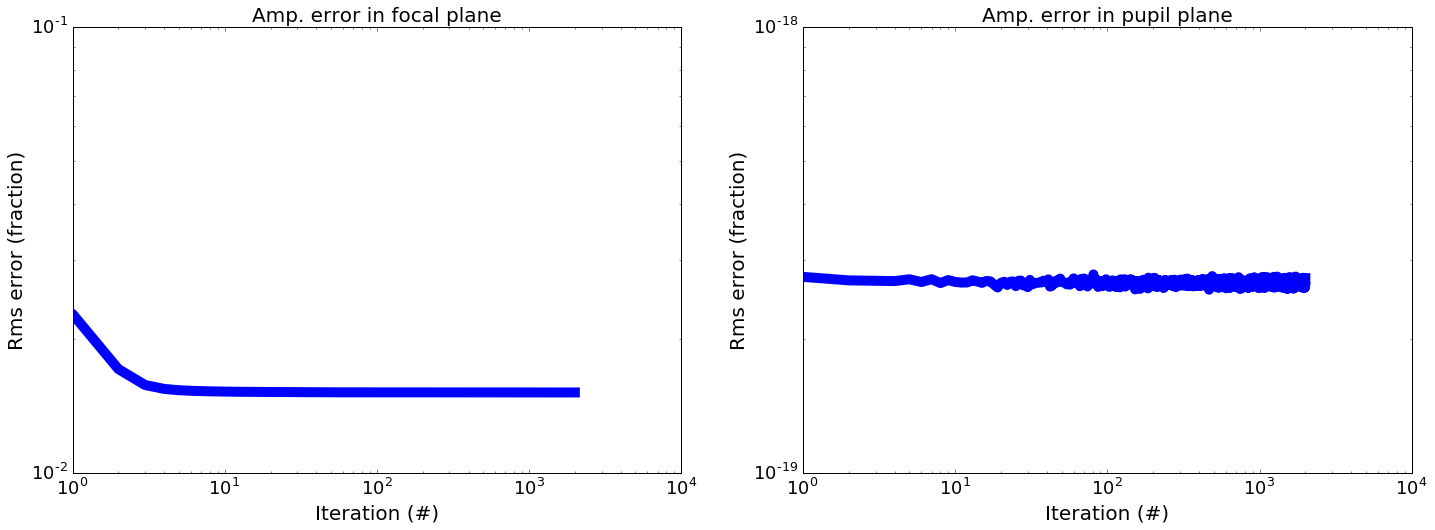

In [177]:
plot_errlist(OSS_errlist_n5,OSS_errpuplist_n5)

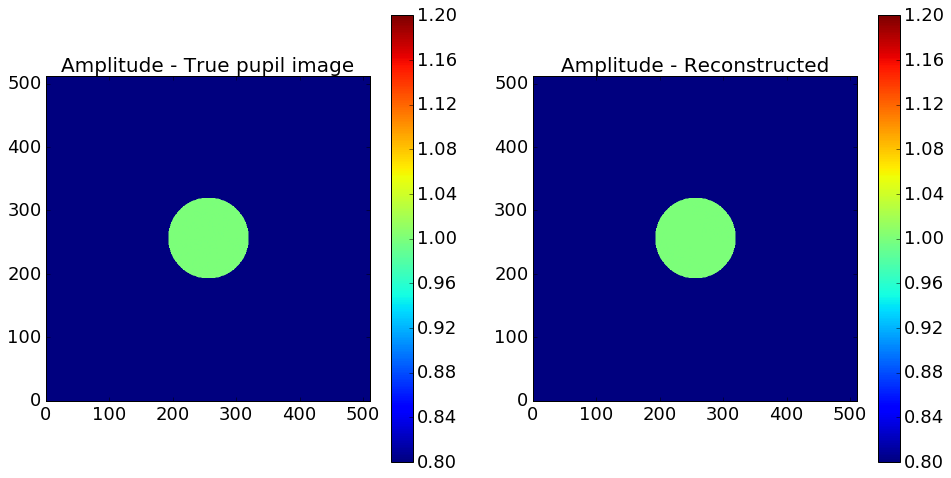

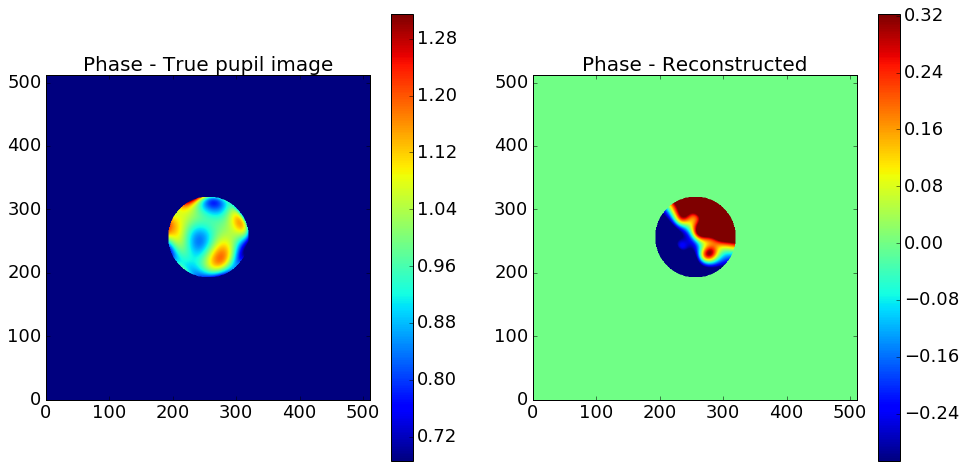

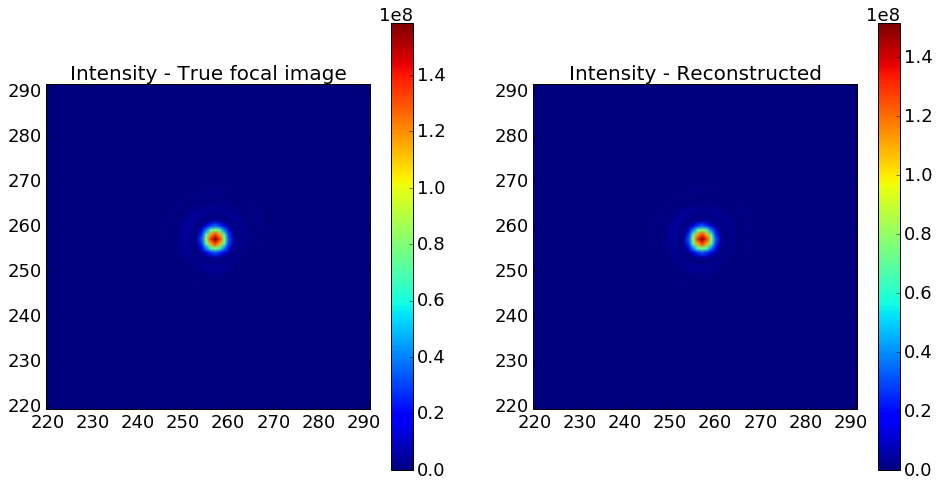

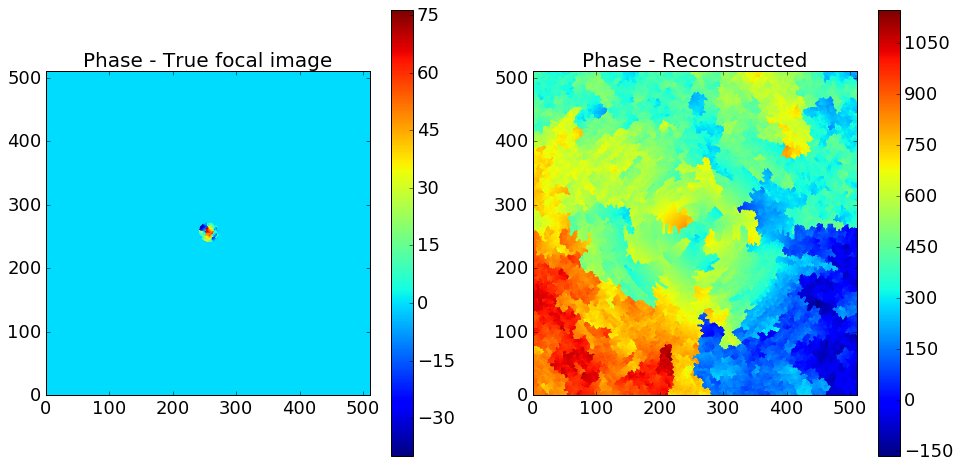

In [178]:
plot_recon(P_n5,F_n5_c,OSS_pup_proj_n5,OSS_foc_n5,recons_clim=True,max_abrPha=0.05)

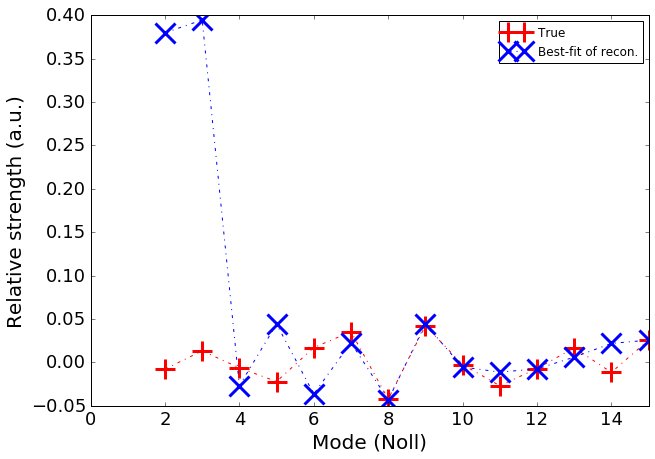

In [179]:
coef_n5_true2, \
coef_n5_reco2 = wrap_up_zern_fit(testn5,
                                 Recon_phasor=OSS_pup_proj_n5,
                                 P_phasor=P_n5,
                                 oversamp=2)

### 6. 0.5 % noise with 1/2 aberration

In [180]:
Pn6,P_n6,Fn6,F_n6 = true_imgs(Npix=128,coeff1=coeff1,coeff2=coeff2,oversamp=2,
                              max_aberP=.25,noise_level=0.005)
##
Fn6_c = clipping(Fn6,512,size=size)
F_n6_c = clipping(F_n6,512,size=size,allpos=False)

testn6 = PR(pup=Pn6,foc=Fn6_c,oversamp=2)

Caution: Pupil image is not used for constraints.
         This is one-image process.


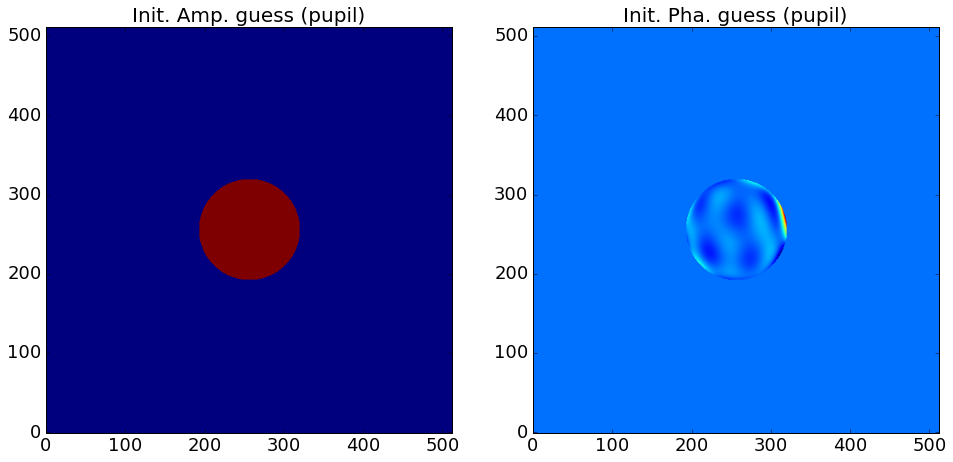

Current filter:


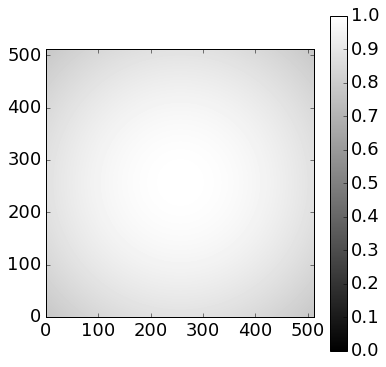

Current iter. : 100
        Error : 1.35e-02
Current iter. : 200
        Error : 1.35e-02
Current filter:


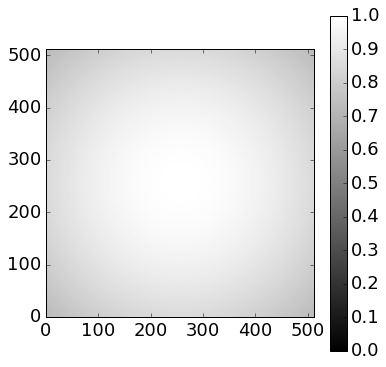

Current iter. : 300
        Error : 1.35e-02
Current iter. : 400
        Error : 1.35e-02
Current filter:


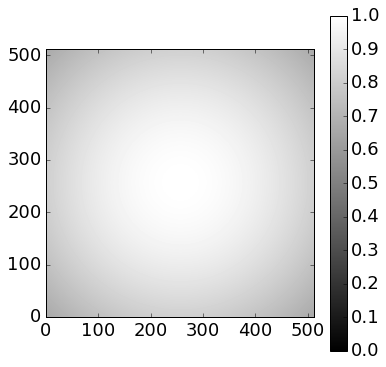

Current iter. : 500
        Error : 1.35e-02
Current iter. : 600
        Error : 1.35e-02
Current filter:


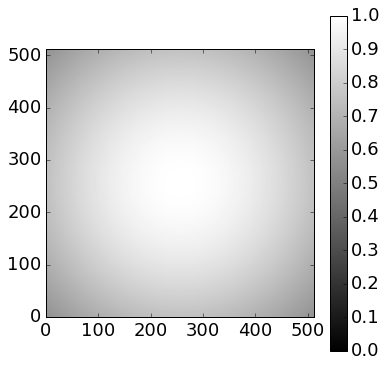

Current iter. : 700
        Error : 1.35e-02
Current iter. : 800
        Error : 1.35e-02
Current filter:


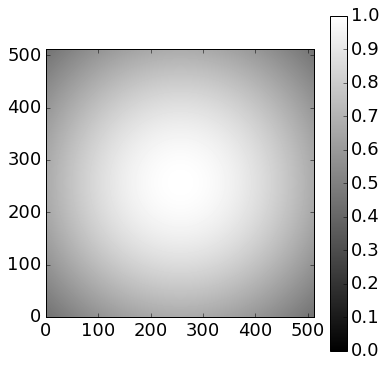

Current iter. : 900
        Error : 1.35e-02
Current iter. : 1000
        Error : 1.35e-02
Current filter:


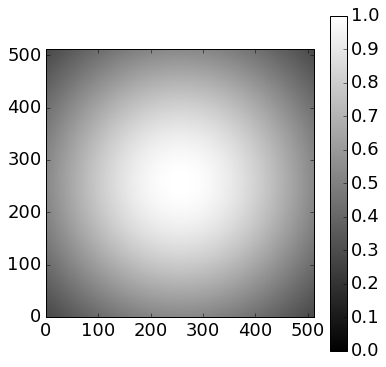

Current iter. : 1100
        Error : 1.35e-02
Current iter. : 1200
        Error : 1.35e-02
Current filter:


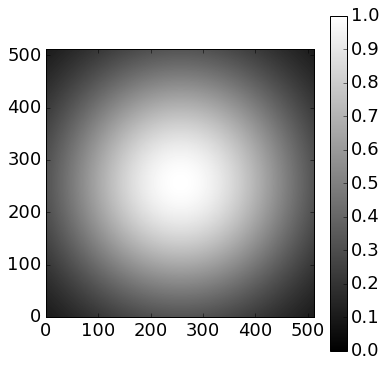

Current iter. : 1300
        Error : 1.35e-02
Current iter. : 1400
        Error : 1.35e-02
Current filter:


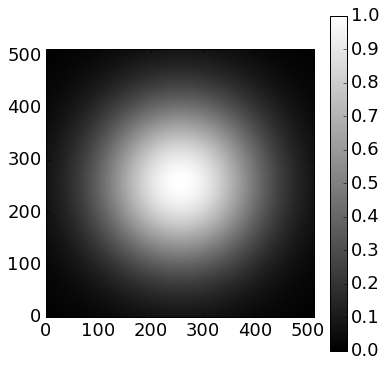

Current iter. : 1500
        Error : 1.35e-02
Current iter. : 1600
        Error : 1.35e-02
Current filter:


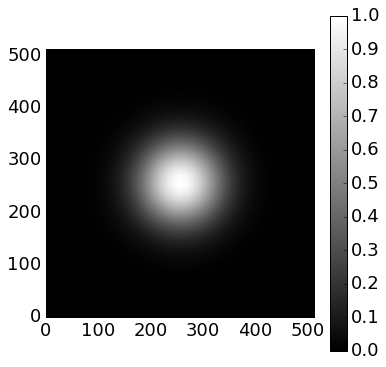

Current iter. : 1700
        Error : 1.35e-02
Current iter. : 1800
        Error : 1.35e-02
Current filter:


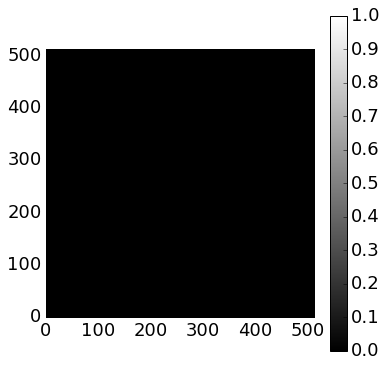

Current iter. : 1900
        Error : 1.35e-02
Current iter. : 2000
        Error : 1.35e-02
-----------------------
First iteration error: 5.85e-02
Final iteration : 2000
Final Error: 1.35e-02


In [181]:
OSS_pup_n6,OSS_foc_n6, \
OSS_errlist_n6, \
OSS_pup_proj_n6, \
OSS_errpuplist_n6 = testn6.OSS(beta=0.5,force_only_phase=True,init='random')

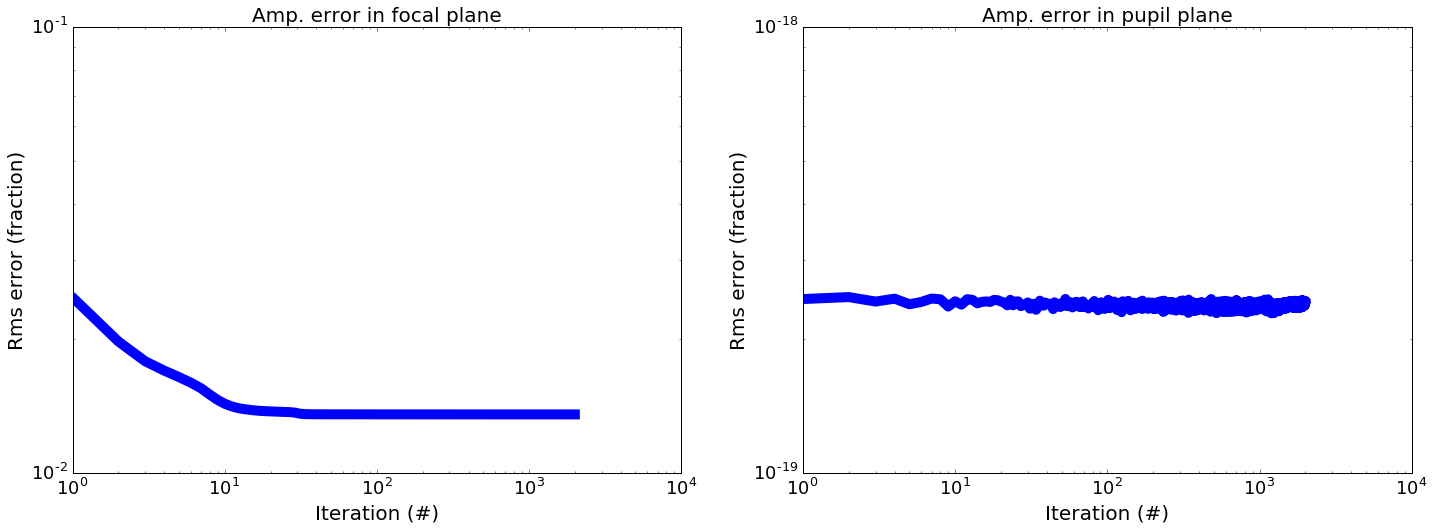

In [182]:
plot_errlist(OSS_errlist_n6,OSS_errpuplist_n6)

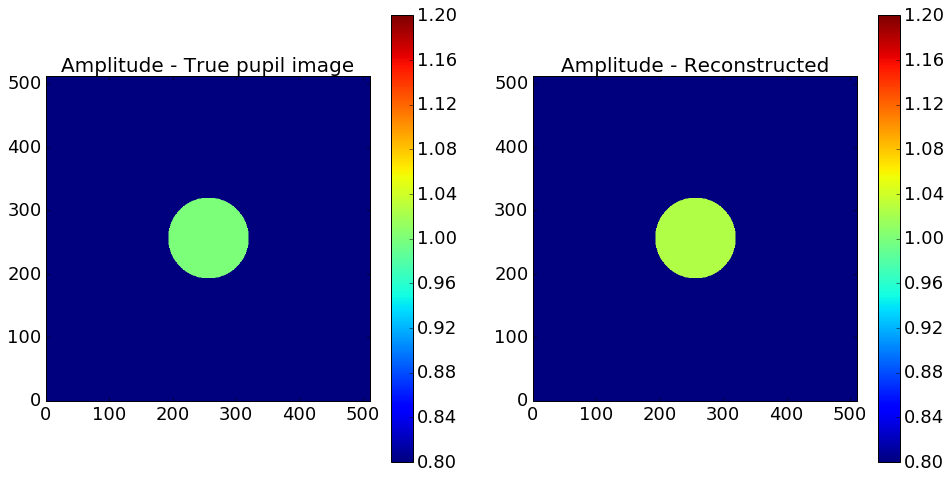

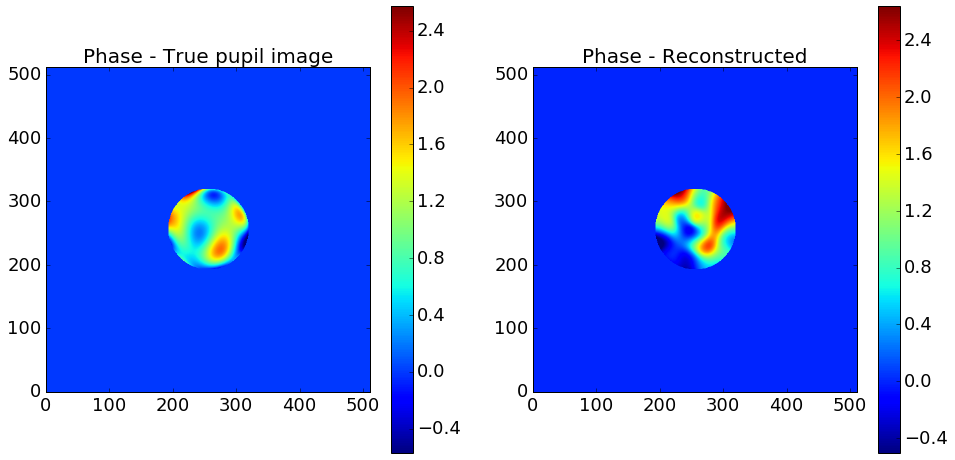

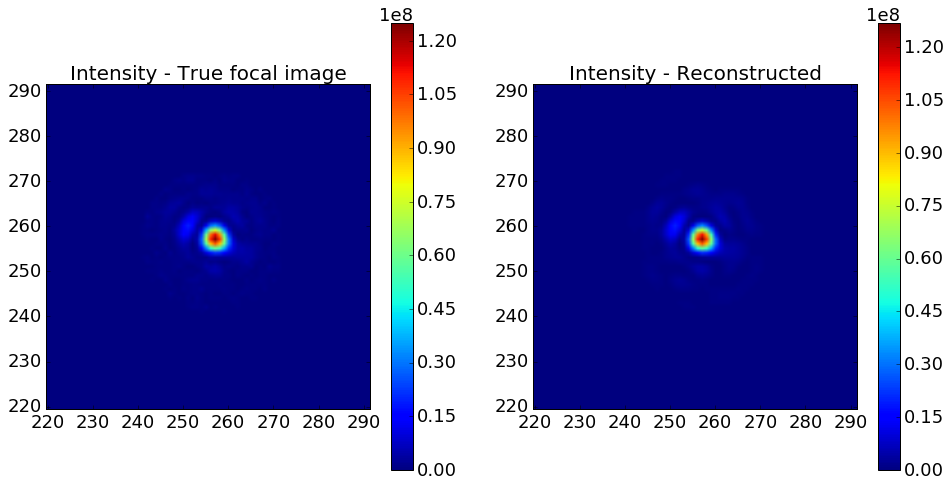

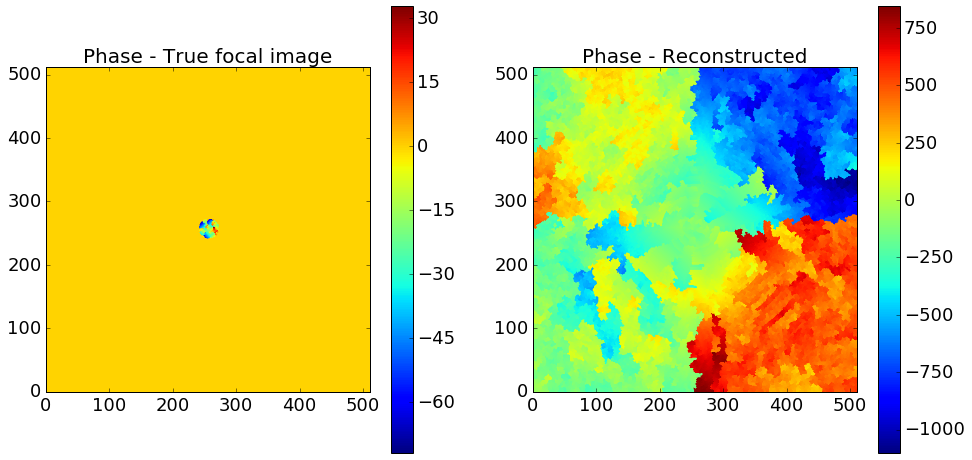

In [183]:
plot_recon(P_n6,F_n6_c,OSS_pup_proj_n6,OSS_foc_n6,recons_clim=True,max_abrPha=0.25)

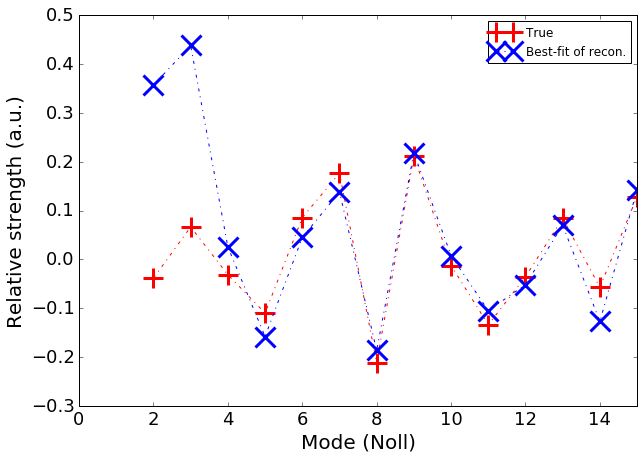

In [184]:
coef_n6_true2, \
coef_n6_reco2 = wrap_up_zern_fit(testn6,
                                 Recon_phasor=OSS_pup_proj_n6,
                                 P_phasor=P_n6,
                                 oversamp=2)

### 7. 0.5 % noise with 1 aberration

In [185]:
Pn7,P_n7,Fn7,F_n7 = true_imgs(Npix=128,coeff1=coeff1,coeff2=coeff2,oversamp=2,
                              max_aberP=.5,noise_level=0.005)
##
Fn7_c = clipping(Fn7,512,size=size)
F_n7_c = clipping(F_n7,512,size=size,allpos=False)

testn7 = PR(pup=Pn7,foc=Fn7_c,oversamp=2)

Caution: Pupil image is not used for constraints.
         This is one-image process.


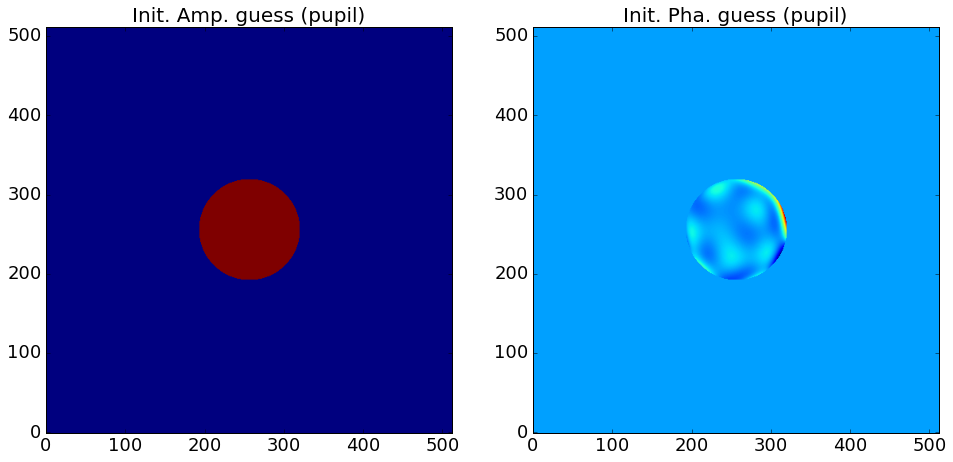

Current filter:


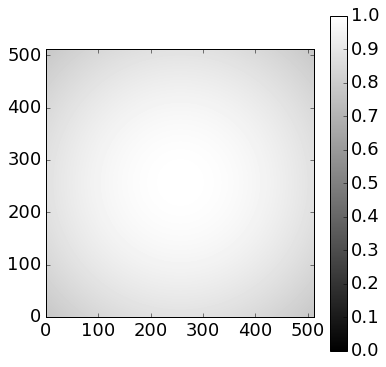

Current iter. : 100
        Error : 1.32e-02
Current iter. : 200
        Error : 1.31e-02
Current filter:


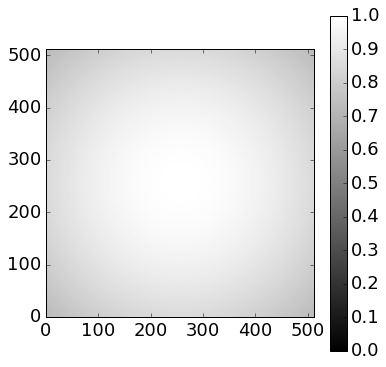

Current iter. : 300
        Error : 1.31e-02
Current iter. : 400
        Error : 1.31e-02
Current filter:


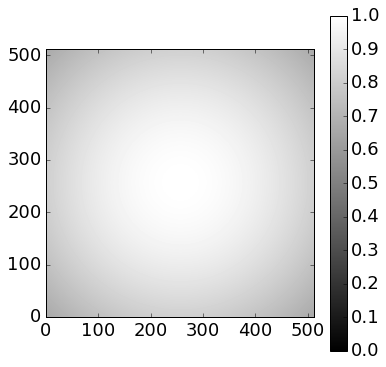

Current iter. : 500
        Error : 1.31e-02
Current iter. : 600
        Error : 1.31e-02
Current filter:


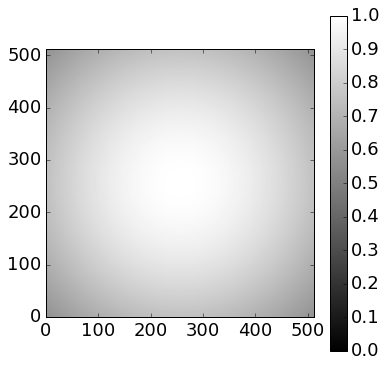

Current iter. : 700
        Error : 1.31e-02
Current iter. : 800
        Error : 1.31e-02
Current filter:


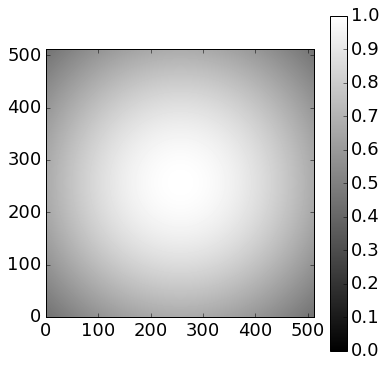

Current iter. : 900
        Error : 1.31e-02
Current iter. : 1000
        Error : 1.31e-02
Current filter:


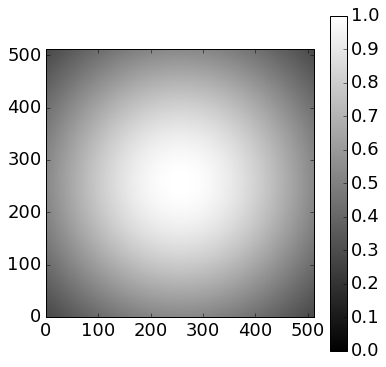

Current iter. : 1100
        Error : 1.31e-02
Current iter. : 1200
        Error : 1.31e-02
Current filter:


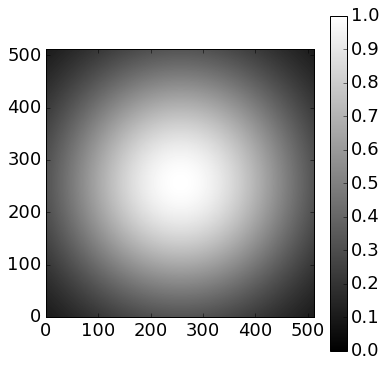

Current iter. : 1300
        Error : 1.31e-02
Current iter. : 1400
        Error : 1.31e-02
Current filter:


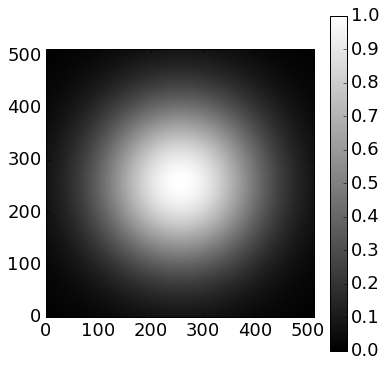

Current iter. : 1500
        Error : 1.31e-02
Current iter. : 1600
        Error : 1.31e-02
Current filter:


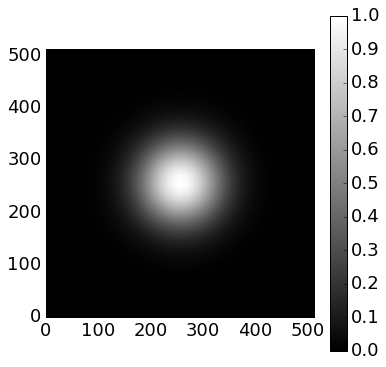

Current iter. : 1700
        Error : 1.31e-02
Current iter. : 1800
        Error : 1.31e-02
Current filter:


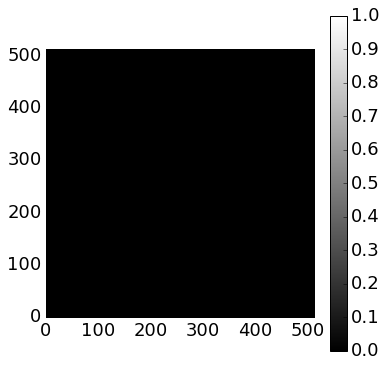

Current iter. : 1900
        Error : 1.31e-02
Current iter. : 2000
        Error : 1.31e-02
-----------------------
First iteration error: 4.52e-02
Final iteration : 2000
Final Error: 1.31e-02


In [186]:
OSS_pup_n7,OSS_foc_n7, \
OSS_errlist_n7, \
OSS_pup_proj_n7, \
OSS_errpuplist_n7 = testn7.OSS(beta=0.5,force_only_phase=True,init='random')

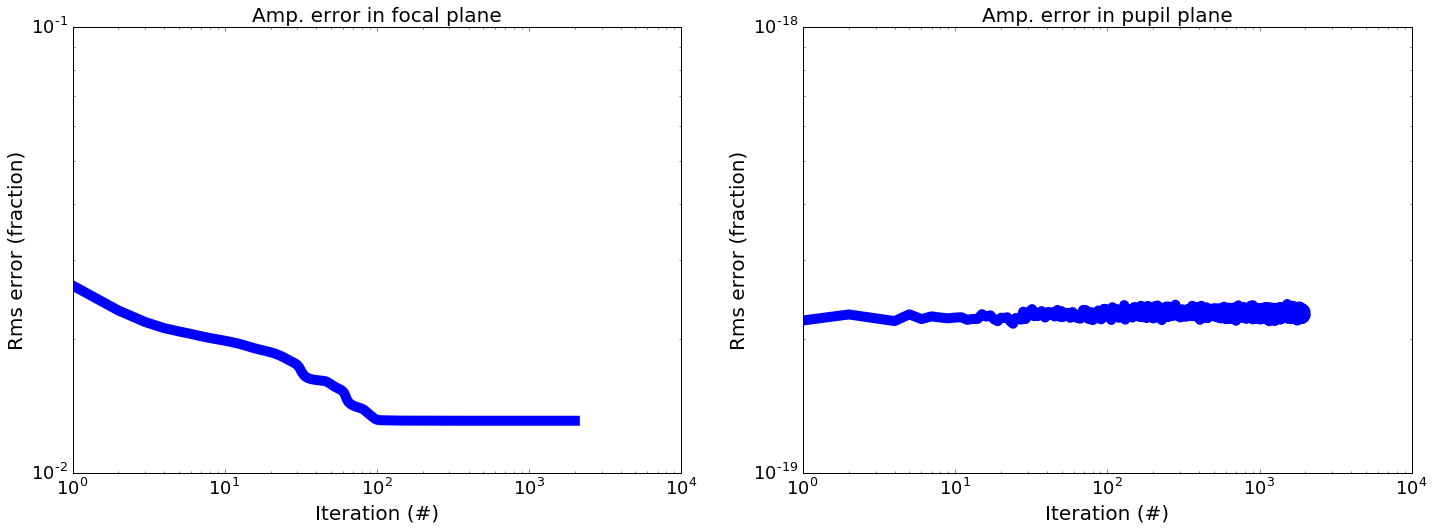

In [187]:
plot_errlist(OSS_errlist_n7,OSS_errpuplist_n7)

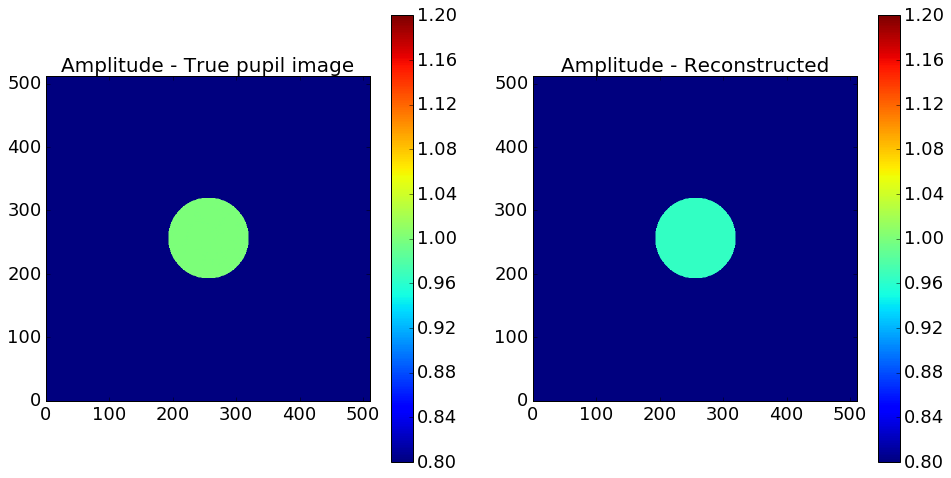

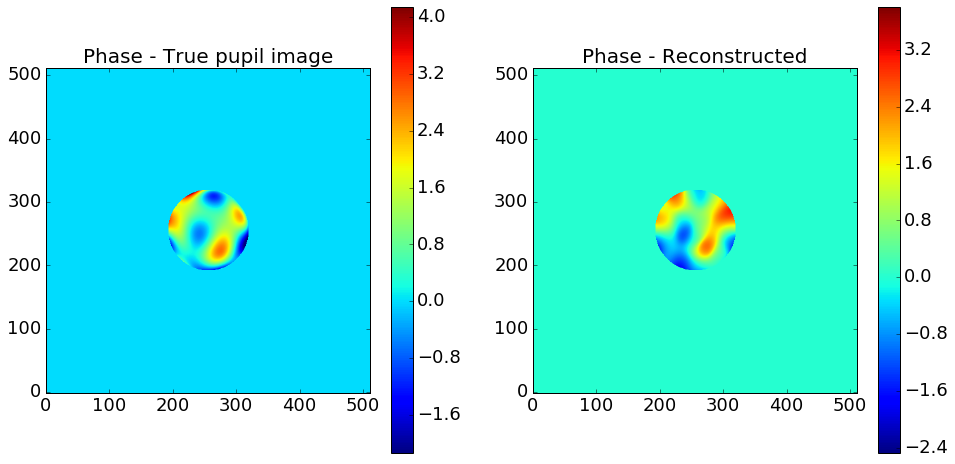

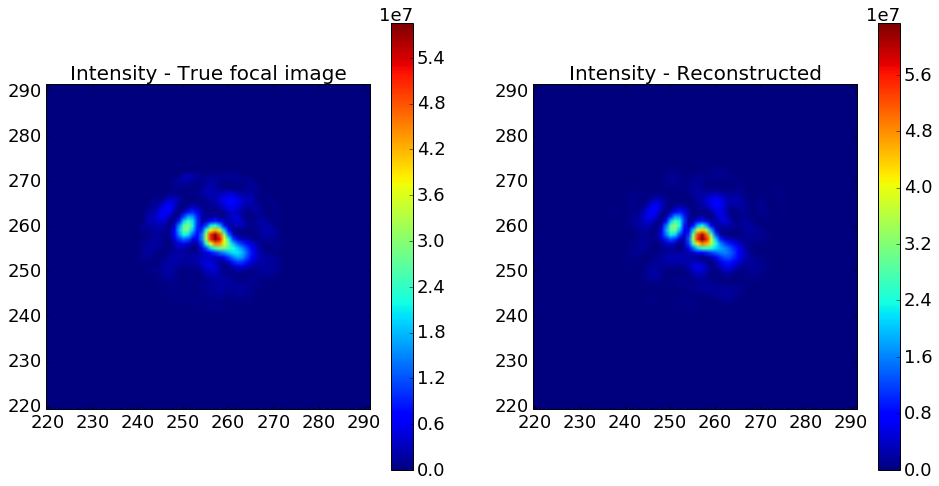

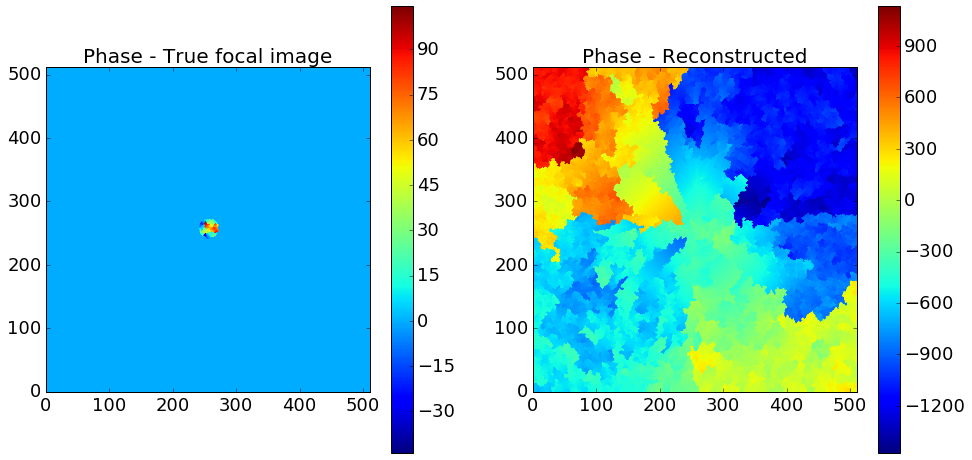

In [188]:
plot_recon(P_n7,F_n7_c,OSS_pup_proj_n7,OSS_foc_n7,recons_clim=True,max_abrPha=0.5)

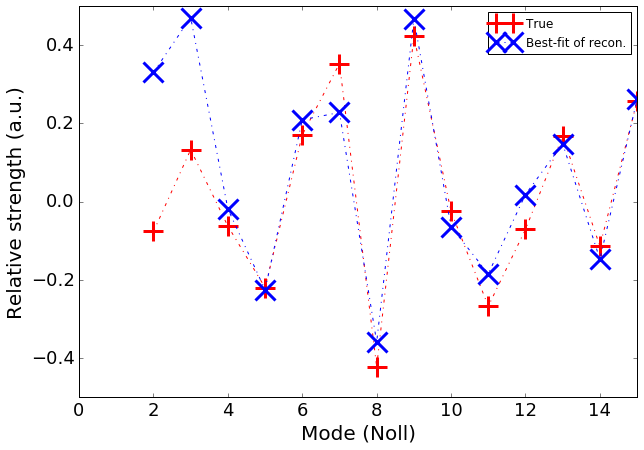

In [189]:
coef_n7_true2, \
coef_n7_reco2 = wrap_up_zern_fit(testn7,
                                 Recon_phasor=OSS_pup_proj_n7,
                                 P_phasor=P_n7,
                                 oversamp=2)

### 8. 0.05 % noise with 1 aberration

In [190]:
Pn8,P_n8,Fn8,F_n8 = true_imgs(Npix=128,coeff1=coeff1,coeff2=coeff2,oversamp=2,
                              max_aberP=.5,noise_level=0.0005)
##
Fn8_c = clipping(Fn8,512,size=size)
F_n8_c = clipping(F_n8,512,size=size,allpos=False)

testn8 = PR(pup=Pn8,foc=Fn8_c,oversamp=2)

Caution: Pupil image is not used for constraints.
         This is one-image process.


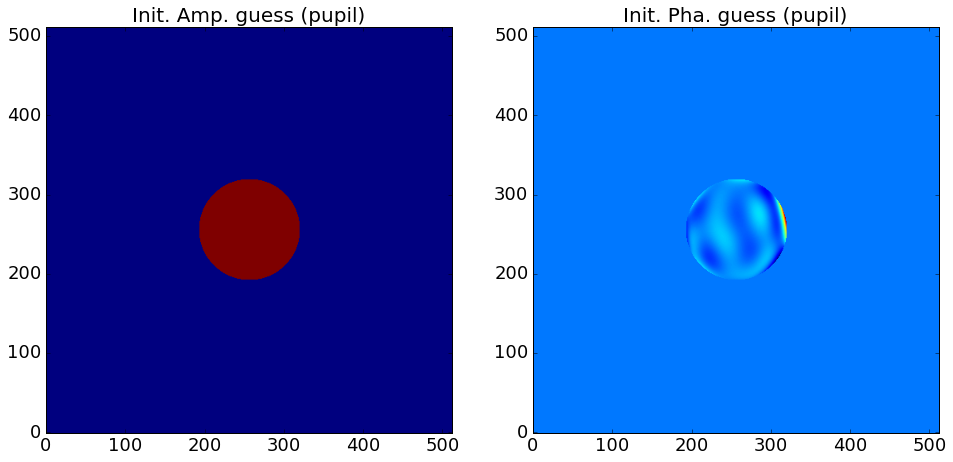

Current filter:


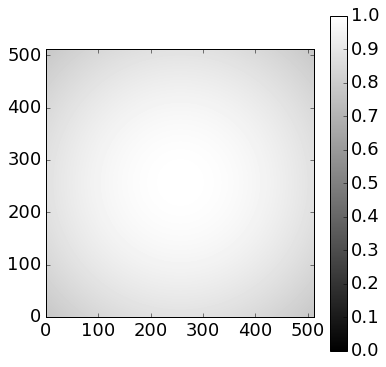

Current iter. : 100
        Error : 1.65e-02
Current iter. : 200
        Error : 1.38e-02
Current filter:


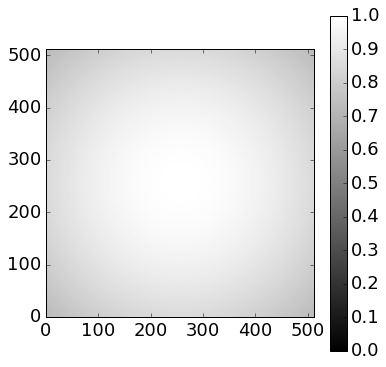

Current iter. : 300
        Error : 1.33e-02
Current iter. : 400
        Error : 1.33e-02
Current filter:


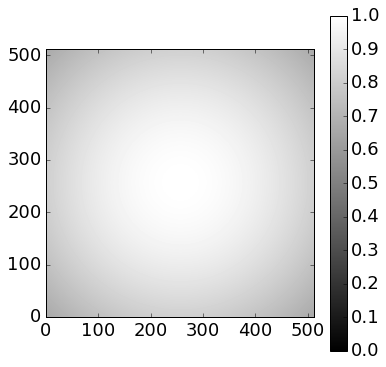

Current iter. : 500
        Error : 1.33e-02
Current iter. : 600
        Error : 1.33e-02
Current filter:


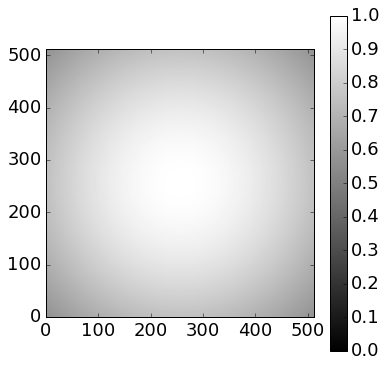

Current iter. : 700
        Error : 1.33e-02
Current iter. : 800
        Error : 1.33e-02
Current filter:


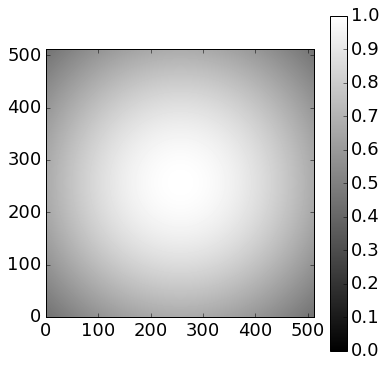

Current iter. : 900
        Error : 1.33e-02
Current iter. : 1000
        Error : 1.33e-02
Current filter:


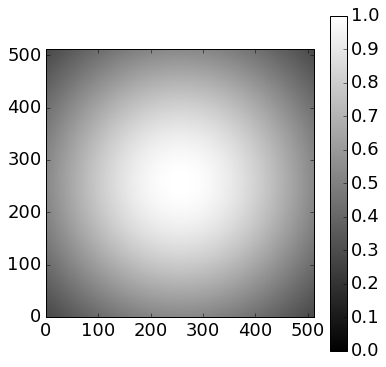

Current iter. : 1100
        Error : 1.33e-02
Current iter. : 1200
        Error : 1.33e-02
Current filter:


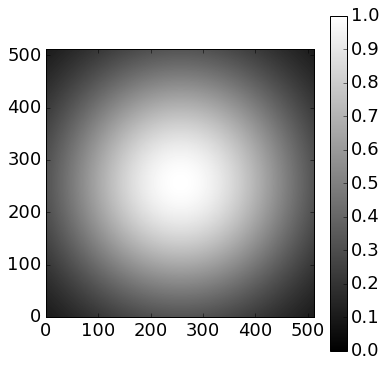

Current iter. : 1300
        Error : 1.33e-02
Current iter. : 1400
        Error : 1.33e-02
Current filter:


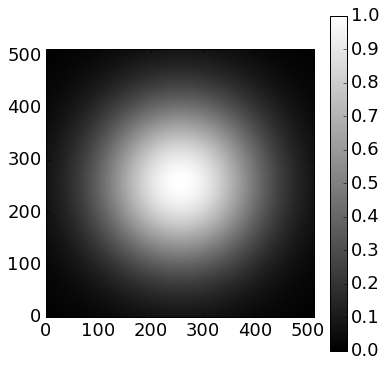

Current iter. : 1500
        Error : 1.33e-02
Current iter. : 1600
        Error : 1.33e-02
Current filter:


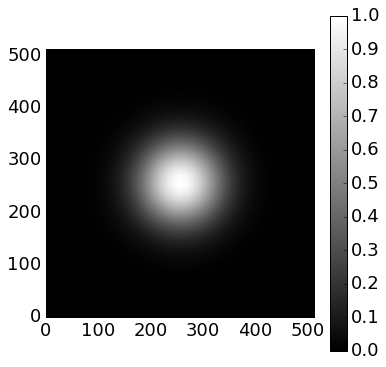

Current iter. : 1700
        Error : 1.33e-02
Current iter. : 1800
        Error : 1.33e-02
Current filter:


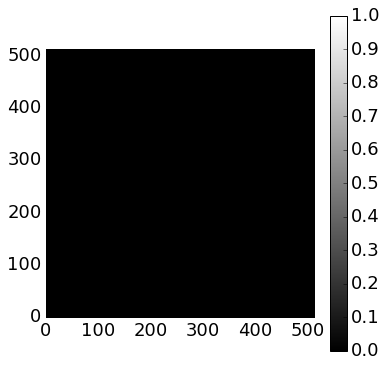

Current iter. : 1900
        Error : 1.33e-02
Current iter. : 2000
        Error : 1.33e-02
-----------------------
First iteration error: 5.16e-02
Final iteration : 2000
Final Error: 1.33e-02


In [191]:
OSS_pup_n8,OSS_foc_n8, \
OSS_errlist_n8, \
OSS_pup_proj_n8, \
OSS_errpuplist_n8 = testn8.OSS(beta=0.5,force_only_phase=True,init='random')

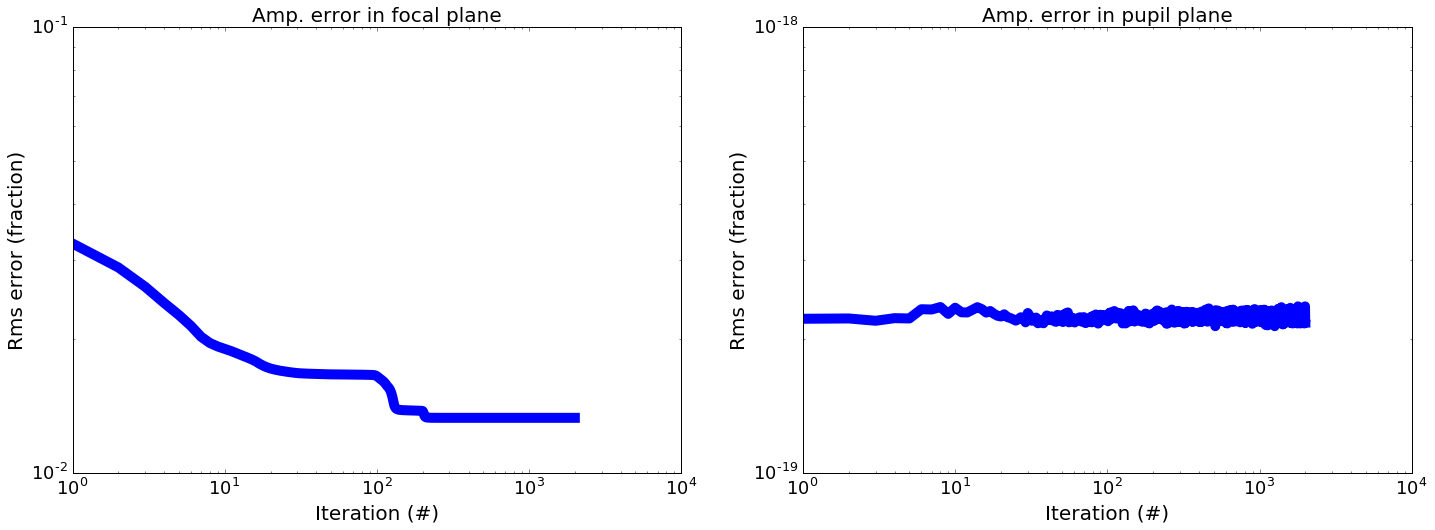

In [192]:
plot_errlist(OSS_errlist_n8,OSS_errpuplist_n8)

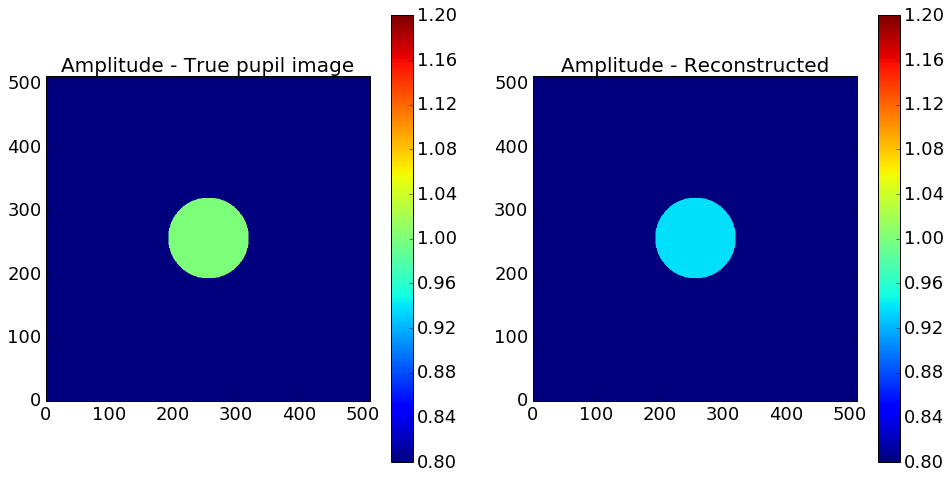

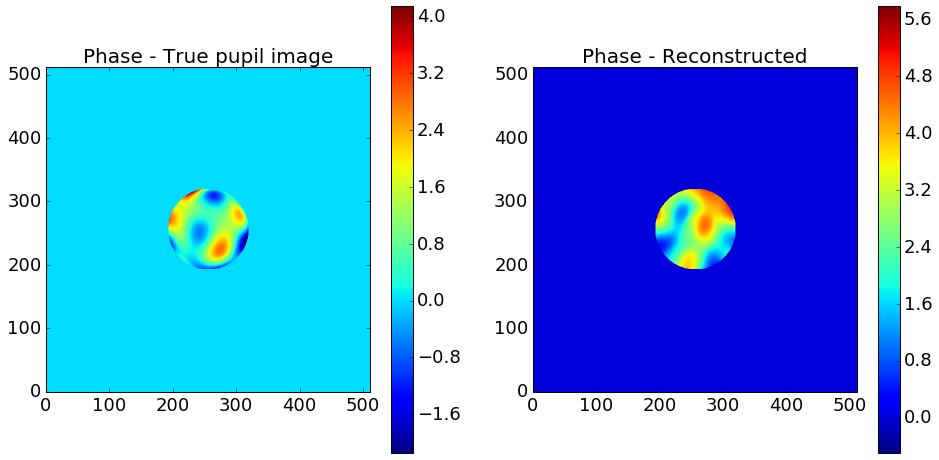

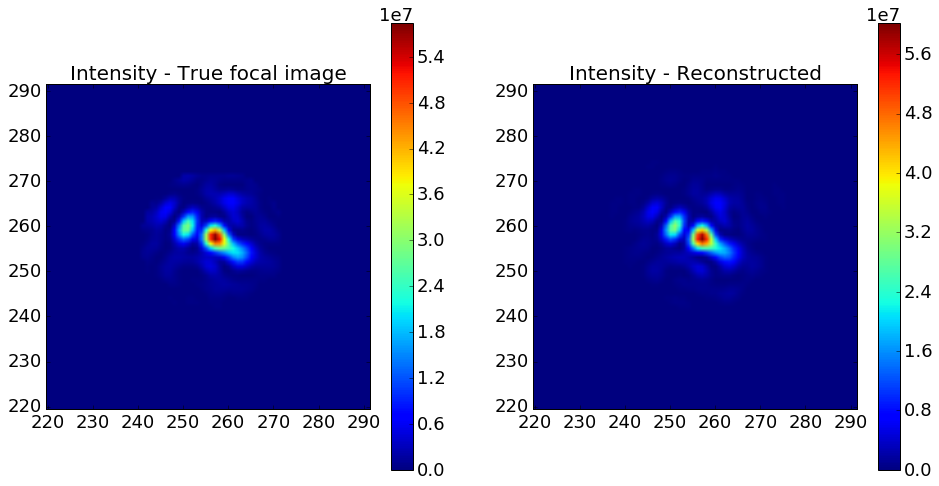

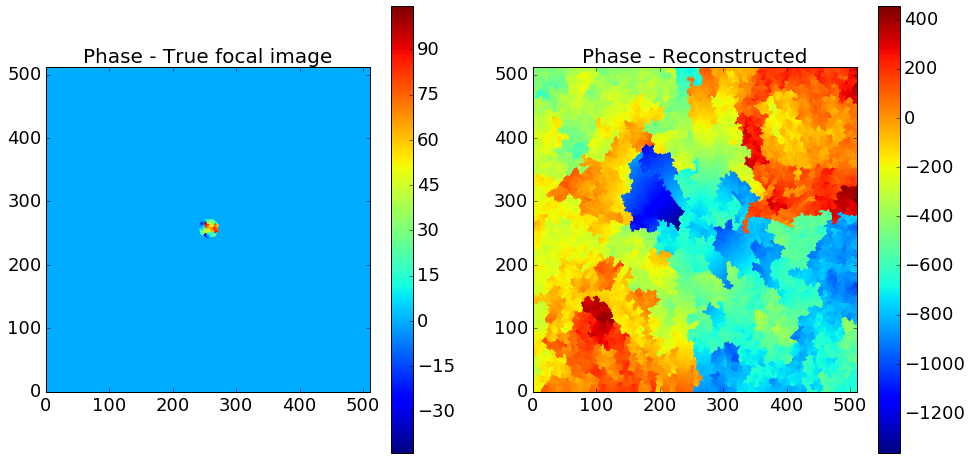

In [193]:
plot_recon(P_n8,F_n8_c,OSS_pup_proj_n8,OSS_foc_n8,recons_clim=True,max_abrPha=0.5)

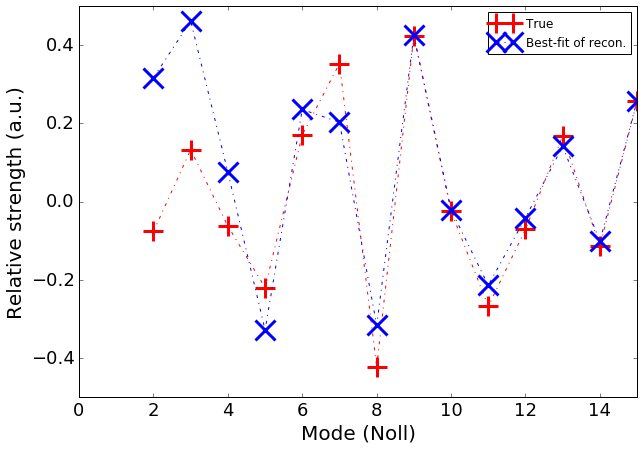

In [201]:
coef_n8_true2, \
coef_n8_reco2 = wrap_up_zern_fit(testn8,
                                 Recon_phasor=OSS_pup_proj_n8,
                                 P_phasor=P_n8,
                                 oversamp=2,flip=True)

### 9. 0.01 % noise with 1 aberration
So how small it'll have to be...

In [195]:
Pn9,P_n9,Fn9,F_n9 = true_imgs(Npix=128,coeff1=coeff1,coeff2=coeff2,oversamp=2,
                              max_aberP=.5,noise_level=0.0001)
##
Fn9_c = clipping(Fn9,512,size=size)
F_n9_c = clipping(F_n9,512,size=size,allpos=False)

testn9 = PR(pup=Pn9,foc=Fn9_c,oversamp=2)

Caution: Pupil image is not used for constraints.
         This is one-image process.


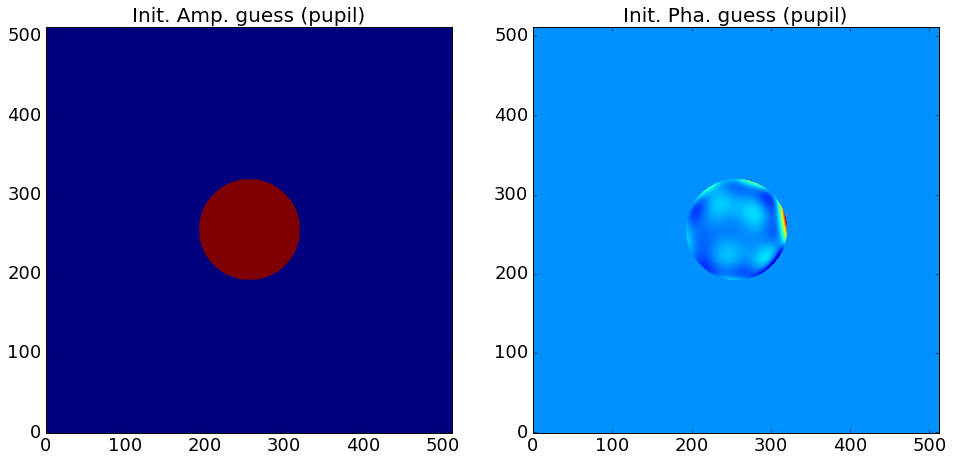

Current filter:


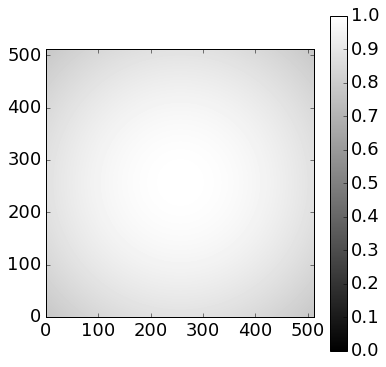

Current iter. : 100
        Error : 1.36e-02
Current iter. : 200
        Error : 1.34e-02
Current filter:


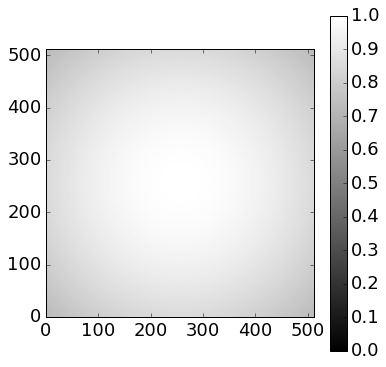

Current iter. : 300
        Error : 1.34e-02
Current iter. : 400
        Error : 1.34e-02
Current filter:


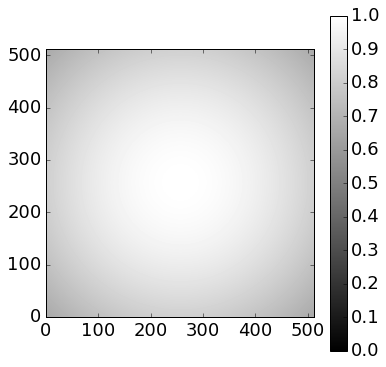

Current iter. : 500
        Error : 1.34e-02
Current iter. : 600
        Error : 1.34e-02
Current filter:


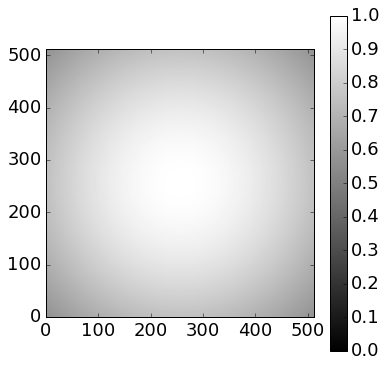

Current iter. : 700
        Error : 1.34e-02
Current iter. : 800
        Error : 1.34e-02
Current filter:


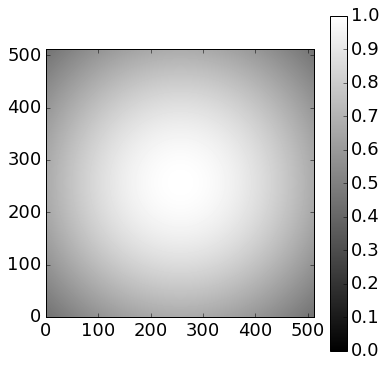

Current iter. : 900
        Error : 1.34e-02
Current iter. : 1000
        Error : 1.34e-02
Current filter:


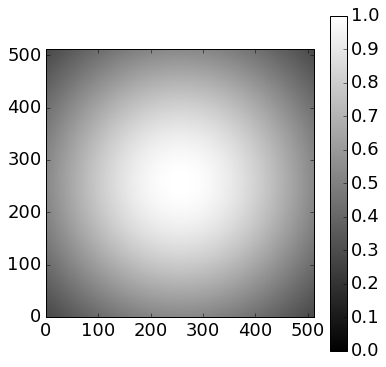

Current iter. : 1100
        Error : 1.34e-02
Current iter. : 1200
        Error : 1.34e-02
Current filter:


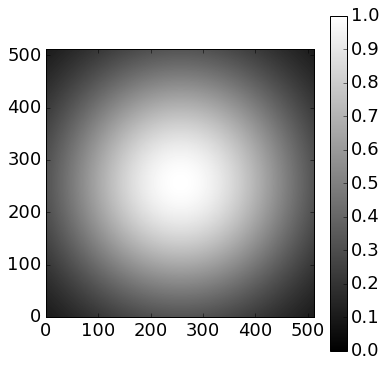

Current iter. : 1300
        Error : 1.34e-02
Current iter. : 1400
        Error : 1.34e-02
Current filter:


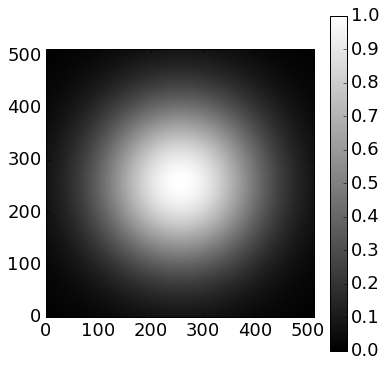

Current iter. : 1500
        Error : 1.34e-02
Current iter. : 1600
        Error : 1.34e-02
Current filter:


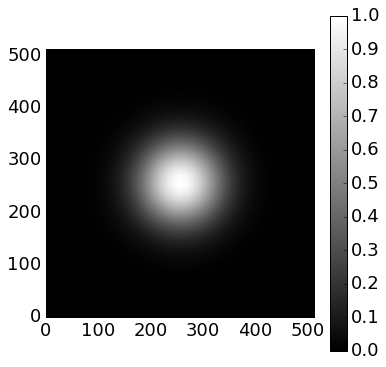

Current iter. : 1700
        Error : 1.34e-02
Current iter. : 1800
        Error : 1.34e-02
Current filter:


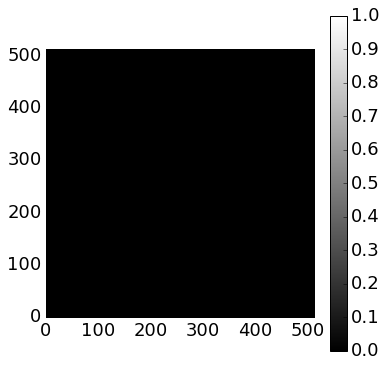

Current iter. : 1900
        Error : 1.34e-02
Current iter. : 2000
        Error : 1.34e-02
-----------------------
First iteration error: 4.85e-02
Final iteration : 2000
Final Error: 1.34e-02


In [196]:
OSS_pup_n9,OSS_foc_n9, \
OSS_errlist_n9, \
OSS_pup_proj_n9, \
OSS_errpuplist_n9 = testn9.OSS(beta=0.5,force_only_phase=True,init='random')

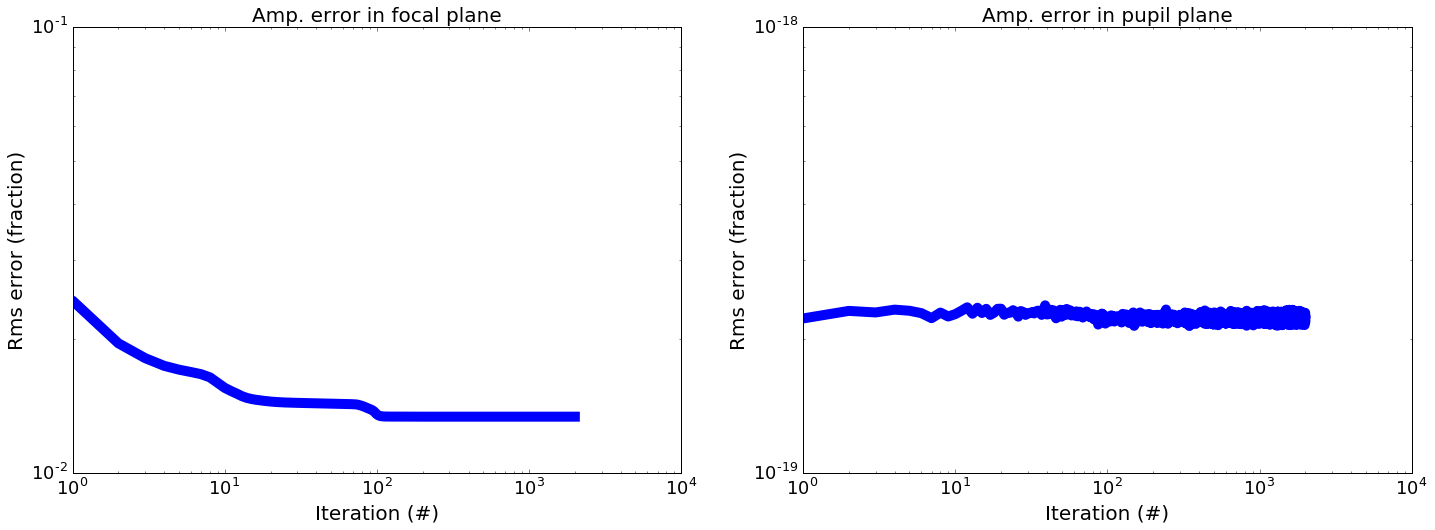

In [197]:
plot_errlist(OSS_errlist_n9,OSS_errpuplist_n9)

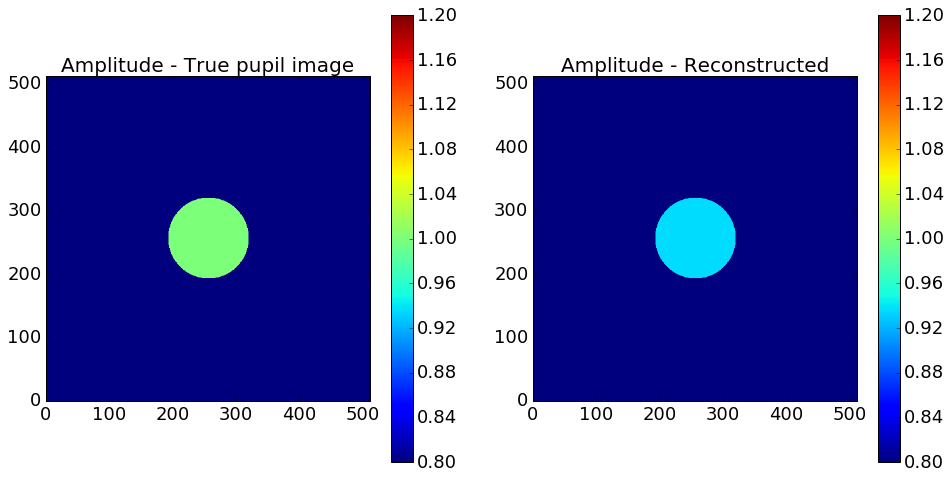

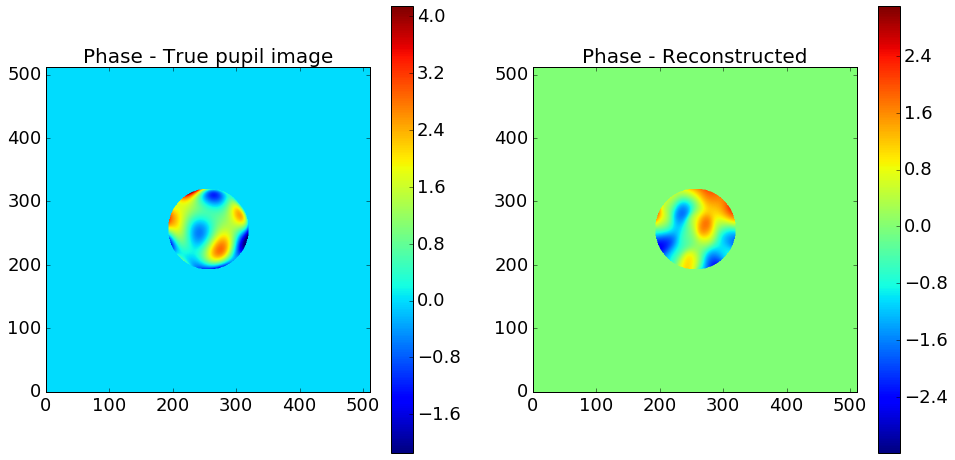

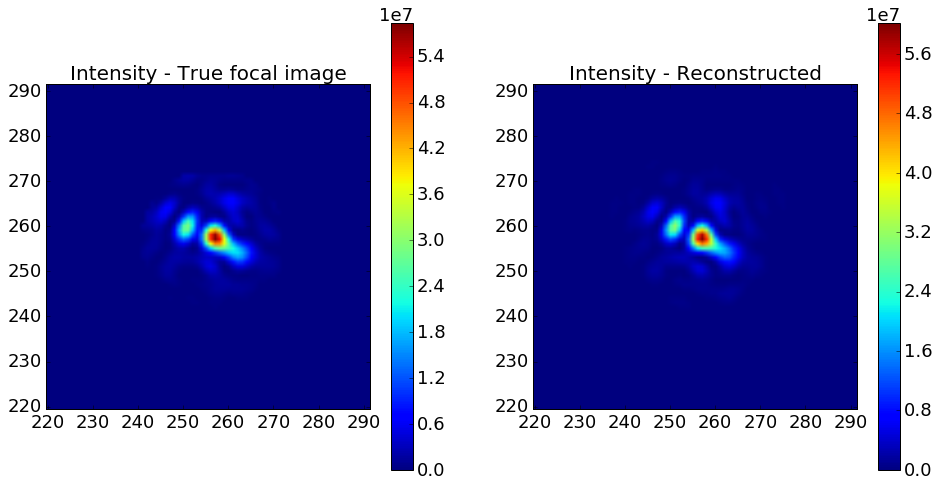

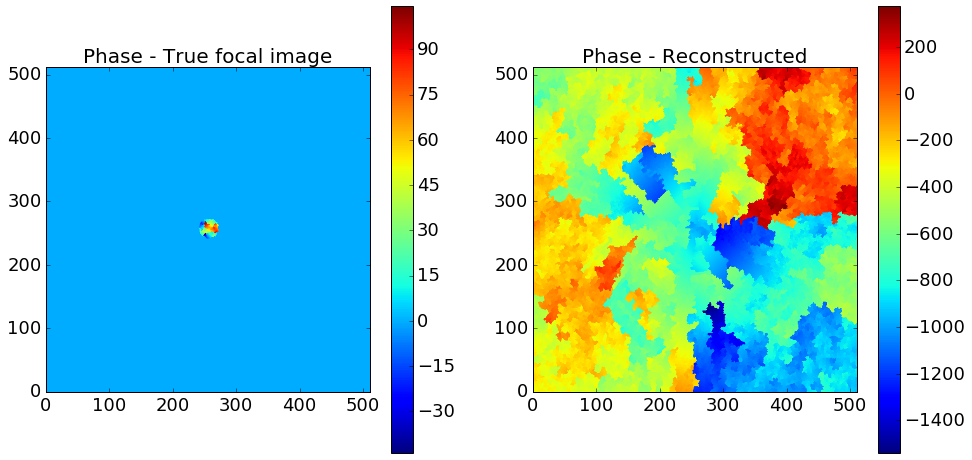

In [198]:
plot_recon(P_n9,F_n9_c,OSS_pup_proj_n9,OSS_foc_n9,recons_clim=True,max_abrPha=0.5)

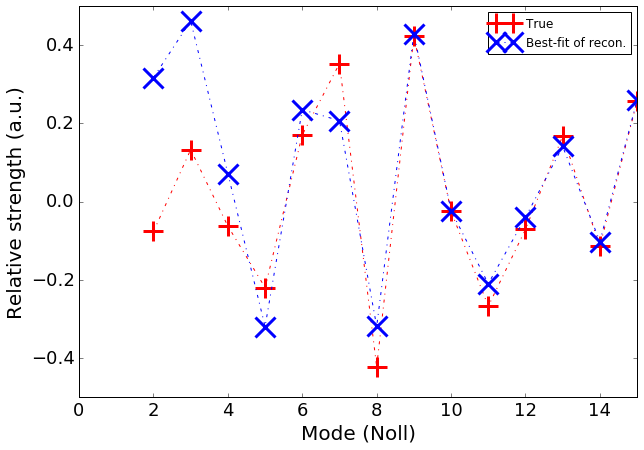

In [202]:
coef_n9_true2, \
coef_n9_reco2 = wrap_up_zern_fit(testn9,
                                 Recon_phasor=OSS_pup_proj_n9,
                                 P_phasor=P_n9,
                                 oversamp=2,flip=True)

---
## Conclusions
1. Appliyng windowing largely alleviates the issuse we [saw](https://nbviewer.jupyter.org/github/Mipanox/GPI_stuff/blob/master/notebooks/PR_OSS-test-noise.ipynb) previously with noises
2. Smaller window size works better, but could also mask out information that might be relevant
3. Tip/tilt phenomenon persists due to center shifting. But shouldn't be a problem is real cases at all
4. Next should try higher noise levels with even smaller aberrations or else